<div id="container" style="position:relative;">
<div style="float:left"><h1> Bakery Data EDA - Abi Magnall </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://twomagpiesbakery.co.uk/wp-content/uploads/2020/11/logo-no-site.jpg" />
</div>
</div>

The purpose of this EDA notebook is to explore and identify any anomalies and trends that exist in the data. Through this exploration the aim is to develop a hypothesis of independent variables that should be incldued in the modelling phase to accurately forecast the Revenue and certain Product Sales Quantities. 

- The identified trends could be general trends overtime, seasonal or against the independent variables selected of `Day`, `TAVG`, `PRCP`, `CPI_Electricity` and `CPI_Food`. 


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
import time
import os
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from plotly.graph_objs import *

## Importing Custom Functions

In [2]:
import BakeryFunctions as bakery

## Get Working Directory

In [3]:
working_directory = os.getcwd()
working_directory

'/Users/abimagnall/Documents/BrainStation/Capstone/Data'

## Importing Preprocessed Dataset

In [4]:
aldeburgh = pd.read_csv(working_directory+'/3_preprocessed_data/aldeburgh_preprocessed.csv')
display(aldeburgh.head())
southwold = pd.read_csv(working_directory+'/3_preprocessed_data/southwold_preprocessed.csv')
display(southwold.head())
darsham = pd.read_csv(working_directory+'/3_preprocessed_data/darsham_preprocessed.csv')
display(darsham.head())
norwich = pd.read_csv(working_directory+'/3_preprocessed_data/norwich_preprocessed.csv')
display(norwich.head())
product_list = pd.read_csv(working_directory+'/2_clean_data/CleanProducts.csv', index_col=0)
display(product_list.head())

TransactionId  ProductId  UnitPrice  Quantity  DiscountAmount  \
0      325356083   21567882        3.2         1            0.00   
1      325399103    1677432        2.6         1            0.00   
2      325400582   20505962        4.5         1            2.25   
3      325400582   15137944        1.8         1            0.00   
4      325403315   20405549        3.4         1            0.00   

   DiscountReasonId  RefundReasonId        Date  Revenue  
0               0.0             0.0  2020-09-01     3.20  
1               0.0             0.0  2020-09-01     2.60  
2           13524.0             0.0  2020-09-01     2.25  
3               0.0             0.0  2020-09-01     1.80  
4               0.0             0.0  2020-09-01     3.40

TransactionId  ProductId  UnitPrice  Quantity  DiscountAmount  \
0      368108160    1677386       2.60         1             0.0   
1      368116614    1677402       2.85         1             0.0   
2      368121026    1677395       2.70         1             0.0   
3      368121026    9262077       2.40         1             0.0   
4      368121026    1677551       2.00         1             0.0   

   DiscountReasonId  RefundReasonId        Date  Revenue  
0               0.0             0.0  2021-07-01     2.60  
1               0.0             0.0  2021-07-01     2.85  
2               0.0             0.0  2021-07-01     2.70  
3               0.0             0.0  2021-07-01     2.40  
4               0.0             0.0  2021-07-01     2.00

TransactionId  ProductId  UnitPrice  Quantity  DiscountAmount  \
0      368107752    1677554        2.2         1             0.0   
1      368107752    1677387        2.9         1             0.0   
2      368107986    1677480        3.9         1             0.0   
3      368107986    7243504        2.5         1             0.0   
4      368107986    1677539        1.7         1             0.0   

   DiscountReasonId  RefundReasonId        Date  Revenue  
0               0.0             0.0  2021-07-01      2.2  
1               0.0             0.0  2021-07-01      2.9  
2               0.0             0.0  2021-07-01      3.9  
3               0.0             0.0  2021-07-01      2.5  
4               0.0             0.0  2021-07-01      1.7

TransactionId  ProductId  UnitPrice  Quantity  DiscountAmount  \
0      368106886   17865562       2.50         1             0.0   
1      368106886    1677415       2.30         1             0.0   
2      368106886    1677402       2.85         1             0.0   
3      368107620    1677426       2.90         1             0.0   
4      368107620    1677674       3.20         1             0.0   

   DiscountReasonId  RefundReasonId        Date  Revenue  
0               0.0             0.0  2021-07-01     2.50  
1               0.0             0.0  2021-07-01     2.30  
2               0.0             0.0  2021-07-01     2.85  
3               0.0             0.0  2021-07-01     2.90  
4               0.0             0.0  2021-07-01     3.20

Name  ProductId
0     PORRIDGE T/O    1677377
1     PORRIDGE E/I    1677378
2  TOAST & JAM E/I    1677384
3    LATTE REG T/O    1677386
4  LATTE LARGE T/O    1677387

In [5]:
# Importing weather data
weather = pd.read_csv(working_directory+'/3_preprocessed_data/processed_weather.csv')
display(weather.head())

Date  TAVG  PRCP
0  2020-09-01    24  0.00
1  2020-09-02    27  0.00
2  2020-09-03    31  0.07
3  2020-09-04    27  0.08
4  2020-09-05    23  0.01

In [6]:
# Importing CPI data
cpi = pd.read_csv(working_directory+'/3_preprocessed_data/cpi_processed_data.csv')
display(cpi.head())

Date  CPI INDEX 04.5 : ELECTRICITY, GAS AND OTHER FUELS 2015=100  \
0  30/09/2020                                              107.6            
1  31/10/2020                                              100.6            
2  30/11/2020                                              100.5            
3  31/12/2020                                              100.9            
4  31/01/2021                                              101.1            

   CPI INDEX 01.1 : FOOD 2015=100  
0                           102.8  
1                           102.9  
2                           102.9  
3                           102.3  
4                           102.8

In [7]:
# Renaming the cpi columns 
cpi.rename(columns={'CPI INDEX 04.5 : ELECTRICITY, GAS AND OTHER FUELS 2015=100':'CPI_Electricity',
                   'CPI INDEX 01.1 : FOOD 2015=100':'CPI_Food'}, inplace=True)

In [8]:
# Importing school holiday data
school_hols = pd.read_csv(working_directory+'/3_preprocessed_data/school_holidays.csv')
display(school_hols.head())

School Holiday        Date
0  School Holiday  24/10/2020
1  School Holiday  25/10/2020
2  School Holiday  26/10/2020
3  School Holiday  27/10/2020
4  School Holiday  28/10/2020

In [9]:
shops_clean = [aldeburgh, southwold, norwich, darsham]

# Part 1 : Initial EDA on Clean Datasets

## Initial Analysis into Combined Shop Data
For the inital exploratory analysis, the four bakery datasets will be combined and summed to provide an overview of trends of quantity and products over time. This is done using to `pd.concat` method. A `ShopId` column will be added so exploration into trends in individual shops can occur. 

In [10]:
aldeburgh['ShopId'] = 'ALD'
southwold['ShopId'] = 'SW'
darsham['ShopId'] = 'DAR'
norwich['ShopId'] = 'NOR'

In [11]:
combined_shop_sales = pd.concat([aldeburgh,southwold,norwich,darsham])
combined_shop_sales

TransactionId  ProductId  UnitPrice  Quantity  DiscountAmount  \
0           325356083   21567882        3.2         1            0.00   
1           325399103    1677432        2.6         1            0.00   
2           325400582   20505962        4.5         1            2.25   
3           325400582   15137944        1.8         1            0.00   
4           325403315   20405549        3.4         1            0.00   
...               ...        ...        ...       ...             ...   
503245      467649692    1677522       11.0         1            0.00   
503246      467650555    8981483        2.3         1            1.15   
503247      467650555   24670970        4.0         1            0.00   
503248      467650555    2971055       11.0         1            0.00   
503249      467650555   24670935       11.0         1            0.00   

        DiscountReasonId  RefundReasonId        Date  Revenue ShopId  
0                    0.0             0.0  2020-09-01     3.20    ALD  
1                    0.0             0.0  2020-09-01     2.60    ALD  
2                13524.0             0.0  2020-09-01     2.25    ALD  
3                    0.0             0.0  2020-09-01     1.80    ALD  
4                    0.0             0.0  2020-09-01     3.40    ALD  
...                  ...             ...         ...      ...    ...  
503245               0.0             0.0  2022-09-30    11.00    DAR  
503246           13524.0             0.0  2022-09-30     1.15    DAR  
503247               0.0             0.0  2022-09-30     4.00    DAR  
503248               0.0             0.0  2022-09-30    11.00    DAR  
503249               0.0             0.0  2022-09-30    11.00    DAR  

[1979121 rows x 10 columns]

## To Create Monthly Revenue for Each Shop

In [12]:
monthly_revenue = pd.DataFrame()
monthly_revenue['Date'] = combined_shop_sales['Date']
monthly_revenue['ALD_Revenue'] = aldeburgh['Revenue']
monthly_revenue['SW_Revenue'] = southwold['Revenue']
monthly_revenue['DAR_Revenue'] = darsham['Revenue']
monthly_revenue['NOR_Revenue'] = norwich['Revenue']
monthly_revenue

Date  ALD_Revenue  SW_Revenue  DAR_Revenue  NOR_Revenue
0       2020-09-01         3.20        2.60         2.20         2.50
1       2020-09-01         2.60        2.85         2.90         2.30
2       2020-09-01         2.25        2.70         3.90         2.85
3       2020-09-01         1.80        2.40         2.50         2.90
4       2020-09-01         3.40        2.00         1.70         3.20
...            ...          ...         ...          ...          ...
503245  2022-09-30         8.80        4.50        11.00          NaN
503246  2022-09-30         9.00        4.50         1.15          NaN
503247  2022-09-30         6.20        1.50         4.00          NaN
503248  2022-09-30         4.80        2.00        11.00          NaN
503249  2022-09-30         3.10        2.80        11.00          NaN

[1979121 rows x 5 columns]

In [13]:
monthly_revenue.set_index('Date', inplace=True)
monthly_revenue.index = pd.to_datetime(monthly_revenue.index)
monthly_revenue = monthly_revenue.resample('MS').sum()
monthly_revenue

ALD_Revenue  SW_Revenue  DAR_Revenue  NOR_Revenue
Date                                                         
2020-09-01    299763.98   309853.46    296409.60    122039.99
2020-10-01    292437.61   292518.19    290668.45    123751.93
2020-11-01    162756.56   159707.35    163240.32     70755.54
2020-12-01    189602.01   188400.59    189330.54     87037.59
2021-01-01     99848.17   101447.71     99989.02     43165.86
2021-02-01    106517.57   105013.32    108208.52     47626.08
2021-03-01    161132.44   152424.87    163718.72     72074.70
2021-04-01    285585.78   268357.66    286619.59    129635.48
2021-05-01    341953.61   310573.78    268726.27    145435.85
2021-06-01    359780.89   322490.30    254361.85    151097.42
2021-07-01    371778.98   404608.39    424637.36    351834.98
2021-08-01    431311.38   478841.69    495906.59    377623.30
2021-09-01    305813.29   356075.75    368705.44    236250.88
2021-10-01    307034.51   355083.82    343072.62    240257.62
2021-11-01    243627.39   272486.59    274592.14    193925.34
2021-12-01    241142.87   264019.31    269813.82    198857.23
2022-01-01    232644.41   252839.19    252962.77    194189.78
2022-02-01    233541.25   243266.58    240675.44    190897.28
2022-03-01    246589.09   240820.71    254430.72    182675.85
2022-04-01    327825.87   319875.94    349681.11    203811.20
2022-05-01    306859.02   299951.58    285941.99    181167.89
2022-06-01    324747.12   321334.68    234534.06    180436.72
2022-07-01    390245.23   313196.15    291110.84    126441.49
2022-08-01    459189.00   322125.24    311211.44     70605.93
2022-09-01    321185.37   218954.84    196417.70     64071.75

## Initial Overview of All Shop Data

In [14]:
bakery.further_eda(combined_shop_sales)

There are 10 columns and 1979121 rows 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1979121 entries, 0 to 503249
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   TransactionId     int64  
 1   ProductId         int64  
 2   UnitPrice         float64
 3   Quantity          int64  
 4   DiscountAmount    float64
 5   DiscountReasonId  float64
 6   RefundReasonId    float64
 7   Date              object 
 8   Revenue           float64
 9   ShopId            object 
dtypes: float64(5), int64(3), object(2)
memory usage: 166.1+ MB


None


The number of missing values in each column are:


TransactionId       0
ProductId           0
UnitPrice           0
Quantity            0
DiscountAmount      0
DiscountReasonId    0
RefundReasonId      0
Date                0
Revenue             0
ShopId              0
dtype: int64


There are 0 duplicated rows of data in the dataset



TransactionId     ProductId     UnitPrice      Quantity  \
count   1.979121e+06  1.979121e+06  1.979121e+06  1.979121e+06   
mean    3.950637e+08  8.366646e+06  3.142459e+00  1.186533e+00   
std     4.171940e+07  8.365563e+06  1.597793e+00  6.872595e-01   
min     3.252873e+08  1.677377e+06  0.000000e+00  0.000000e+00   
25%     3.578232e+08  1.677452e+06  2.300000e+00  1.000000e+00   
50%     3.917309e+08  1.677681e+06  2.800000e+00  1.000000e+00   
75%     4.318960e+08  1.513794e+07  3.500000e+00  1.000000e+00   
max     4.676506e+08  2.526304e+07  1.250000e+02  2.400000e+02   

       DiscountAmount  DiscountReasonId  RefundReasonId       Revenue  
count    1.979121e+06      1.979121e+06    1.979121e+06  1.979121e+06  
mean     1.423006e-02      2.041457e+02    2.124288e+01  3.649284e+00  
std      2.105897e-01      3.122491e+03    6.154839e+02  2.420860e+00  
min      0.000000e+00      0.000000e+00    0.000000e+00  0.000000e+00  
25%      0.000000e+00      0.000000e+00    0.000000e+00  2.350000e+00  
50%      0.000000e+00      0.000000e+00    0.000000e+00  3.000000e+00  
75%      0.000000e+00      0.000000e+00    0.000000e+00  4.100000e+00  
max      2.980000e+01      8.498100e+04    1.984900e+04  2.000000e+02

## Observations 
- There are 1,957,098 individual transactions in the dataset
- There are no missing or duplicated values
- All the columns are numerical except for the `Date` column
- The `Date` column is the incorrect datatype 
- There is a large distribution in `UnitPrice` from £0 - £125
- There are transactions with a `UnitPrice` of £0 that need further exploration into 
- The minimum `Quantity` is 0, this needs further exploration into to determine if that is an error or not
- `Revenue` ranges from £0-£200. The £0 transactions are most likely due ot products being refunded or where they've had a `UnitPrice` of £0 

First the `Date` column is converted to DateTime using the `convert_date` function. 

In [15]:
# To convert the date column to datetime
bakery.convert_date(combined_shop_sales)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1979121 entries, 0 to 503249
Data columns (total 10 columns):
 #   Column            Dtype         
---  ------            -----         
 0   TransactionId     int64         
 1   ProductId         int64         
 2   UnitPrice         float64       
 3   Quantity          int64         
 4   DiscountAmount    float64       
 5   DiscountReasonId  float64       
 6   RefundReasonId    float64       
 7   Date              datetime64[ns]
 8   Revenue           float64       
 9   ShopId            object        
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 166.1+ MB


None

## Exploration into the `UnitPrice` Column
In order to explore further into why some transactions have a unit price of zero, the shop table needs to be combined with the product list table to idetify what products have a unit price of zero. This is achieved by merging the shop and product table on the `ProductId` column using the `merge_data` function. 

In [16]:
combined_df = combined_shop_sales.copy()
combined_df = bakery.merge_dataset(combined_df,product_list, 'ProductId')

In [17]:
# A slice of the dataset is taken for transaction rows that have UnitPrice of zero
zero_price = combined_df[combined_df['UnitPrice']==0].copy()
zero_price

TransactionId  ProductId  UnitPrice  Quantity  DiscountAmount  \
134          325358593   15020093        0.0         1             0.0   
3491         325962023   15020093        0.0         1             0.0   
4173         326225515   15020093        0.0         1             0.0   
4265         326257056   15020093        0.0         1             0.0   
4328         326225978   15020093        0.0         1             0.0   
...                ...        ...        ...       ...             ...   
1976472      466719885   23756437        0.0         1             0.0   
1977088      466899154   23305524        0.0         2             0.0   
1977418      467038659   23305524        0.0         1             0.0   
1978295      467358397   23305524        0.0         2             0.0   
1978383      467386839   23305524        0.0         1             0.0   

         DiscountReasonId  RefundReasonId       Date  Revenue ShopId  \
134                   0.0             0.0 2020-09-01      0.0    ALD   
3491                  0.0             0.0 2020-09-04      0.0    ALD   
4173                  0.0             0.0 2020-09-05      0.0    ALD   
4265                  0.0             0.0 2020-09-05      0.0    ALD   
4328                  0.0             0.0 2020-09-05      0.0    ALD   
...                   ...             ...        ...      ...    ...   
1976472               0.0             0.0 2022-09-25      0.0    DAR   
1977088               0.0             0.0 2022-09-26      0.0    DAR   
1977418               0.0             0.0 2022-09-27      0.0    DAR   
1978295               0.0             0.0 2022-09-29      0.0    DAR   
1978383               0.0             0.0 2022-09-29      0.0    DAR   

                     Name  
134       KITCHEN MESSAGE  
3491      KITCHEN MESSAGE  
4173      KITCHEN MESSAGE  
4265      KITCHEN MESSAGE  
4328      KITCHEN MESSAGE  
...                   ...  
1976472  ^^ TAP WATER JUG  
1977088         TAP WATER  
1977418         TAP WATER  
1978295         TAP WATER  
1978383         TAP WATER  

[8489 rows x 11 columns]

In [18]:
zero_price['Name'].value_counts().head(20)

TAP WATER                    7319
^^ TAP WATER GLASS            401
^^ TAP WATER JUG              308
KITCHEN MESSAGE               154
OATLY REG COFFEE T/O          112
VEGANUARY OAT MILK OPTION      20
*Hot milk                      15
NORFOLK DAPPLE                  8
LATTE LARGE T/O                 6
FLAT WHITE REG T/O              5
green smoothie T/O              5
CARNE VAL E/I                   4
CROISSANT T/O                   4
CAPPUCCINO LARGE E/I            3
GRANOLA SLICE T/O               3
CAPPUCCINO LARGE T/O            3
CINNAMON SWIRLS T/O             3
LATTE REG T/O                   3
LATTE REG E/I                   3
CAPPUCCINO REG T/O              3
Name: Name, dtype: int64

### Observations 
- c.97% of the transactions with a unit price of zero are not actual sales but either notes to the kitchen, *KITCHEN MESSAGE*, or free products such as *Tap Water* or *Hot milk*,   therefore are not errors in the data
- The next products with the greatest number of transactions are *OATLY REG COFFEE T/O* and *VEGANUARY OAT MILK OPTION*. Speaking with the owner it was identified that this was a special promotion running through January and February where Oatly oat milk was free. Therefore, the unit price of zero is also correct
- The remainder of the products were identified to be entered incorrectly on the till system. As this only makes up 0.00015% of the entire dataset, they are considered to be statisitcally insignificant 

To not skew any insights derived from the remainder of the EDA or from the modelling phase, the transactions with a unit price of zero will be excluded. 

In [19]:
combined_clean = combined_df[combined_df['UnitPrice']!=0].copy()
combined_clean

TransactionId  ProductId  UnitPrice  Quantity  DiscountAmount  \
0            325356083   21567882        3.2         1            0.00   
1            325399103    1677432        2.6         1            0.00   
2            325400582   20505962        4.5         1            2.25   
3            325400582   15137944        1.8         1            0.00   
4            325403315   20405549        3.4         1            0.00   
...                ...        ...        ...       ...             ...   
1979116      467649692    1677522       11.0         1            0.00   
1979117      467650555    8981483        2.3         1            1.15   
1979118      467650555   24670970        4.0         1            0.00   
1979119      467650555    2971055       11.0         1            0.00   
1979120      467650555   24670935       11.0         1            0.00   

         DiscountReasonId  RefundReasonId       Date  Revenue ShopId  \
0                     0.0             0.0 2020-09-01     3.20    ALD   
1                     0.0             0.0 2020-09-01     2.60    ALD   
2                 13524.0             0.0 2020-09-01     2.25    ALD   
3                     0.0             0.0 2020-09-01     1.80    ALD   
4                     0.0             0.0 2020-09-01     3.40    ALD   
...                   ...             ...        ...      ...    ...   
1979116               0.0             0.0 2022-09-30    11.00    DAR   
1979117           13524.0             0.0 2022-09-30     1.15    DAR   
1979118               0.0             0.0 2022-09-30     4.00    DAR   
1979119               0.0             0.0 2022-09-30    11.00    DAR   
1979120               0.0             0.0 2022-09-30    11.00    DAR   

                               Name  
0        BLUEBERRY & LEMON CAKE T/O  
1                FLAT WHITE REG E/I  
2                      SPELT & CHIA  
3                      AMARETTI T/O  
4           TIRAMISU CAKE SLICE T/O  
...                             ...  
1979116                  DIABLO T/O  
1979117                    BAGUETTE  
1979118   CHOCOLATE POT DESSERT T/O  
1979119           THE GREEN MAN T/O  
1979120            THE LOMBARDY T/O  

[1970632 rows x 11 columns]

## Exploration into the `Quantity` Column 
It was also identified that some transactions had a `Quantity` of zero. Further exploration is required to determine if that is intentional (e.g. from a refunded or complementary item) or whether this is an error in the data. A copy of the the data will be taken to review this. 

In [20]:
zero_quantity = combined_clean[combined_clean['Quantity']==0].copy()
zero_quantity

TransactionId  ProductId  UnitPrice  Quantity  DiscountAmount  \
7836         326872750    1677674        3.2         0             0.0   
18551        329445218    1677449        2.1         0             0.0   
92295        344870106   20405577        3.2         0             0.0   
92296        344870106   20405549        3.4         0             0.0   
92301        344870106   21918560        3.9         0             0.0   
...                ...        ...        ...       ...             ...   
1960671      364189730    7243504        2.5         0             0.0   
1960721      364180976    7580623        3.1         0             0.0   
1960832      364183474    1677389        2.5         0             0.0   
1964014      365193776   15631591       10.0         0             0.0   
1965442      365750002    1677568        2.2         0             0.0   

         DiscountReasonId  RefundReasonId       Date  Revenue ShopId  \
7836                  0.0             0.0 2020-09-08      0.0    ALD   
18551                 0.0             0.0 2020-09-19      0.0    ALD   
92295                 0.0         19849.0 2021-01-04      0.0    ALD   
92296                 0.0         19849.0 2021-01-04      0.0    ALD   
92301                 0.0             0.0 2021-01-04      0.0    ALD   
...                   ...             ...        ...      ...    ...   
1960671               0.0             0.0 2021-06-13      0.0    DAR   
1960721               0.0             0.0 2021-06-13      0.0    DAR   
1960832               0.0             0.0 2021-06-13      0.0    DAR   
1964014               0.0             0.0 2021-06-18      0.0    DAR   
1965442               0.0             0.0 2021-06-20      0.0    DAR   

                                Name  
7836                SAUSAGE ROLL T/O  
18551      ENGLISH BREAKFAST TEA E/I  
92295    DREAMY APPLE CAKE SLICE T/O  
92296        TIRAMISU CAKE SLICE T/O  
92301                 East Coast Rye  
...                              ...  
1960671                 DOUGHNUT T/O  
1960721                 BAKEWELL E/I  
1960832           CAPPUCCINO REG T/O  
1964014   FULL ENGLISH BREAKFAST E/I  
1965442                   ECCLES T/O  

[199 rows x 11 columns]

In [21]:
# To determine how many were refunds, if the RefundReasonId is greater than zero then it is classified as a refund
zero_quantity[zero_quantity['RefundReasonId']>0]

TransactionId  ProductId  UnitPrice  Quantity  DiscountAmount  \
92295        344870106   20405577        3.2         0             0.0   
92296        344870106   20405549        3.4         0             0.0   
92367        344870106   15137944        1.8         0             0.0   
466699       428391187    1677680        2.5         0             0.0   
1477482      368458149    1677427        3.2         0             0.0   

         DiscountReasonId  RefundReasonId       Date  Revenue ShopId  \
92295                 0.0         19849.0 2021-01-04      0.0    ALD   
92296                 0.0         19849.0 2021-01-04      0.0    ALD   
92367                 0.0         19849.0 2021-01-04      0.0    ALD   
466699                0.0         11273.0 2022-04-08      0.0    ALD   
1477482               0.0         19849.0 2021-07-02      0.0    DAR   

                                Name  
92295    DREAMY APPLE CAKE SLICE T/O  
92296        TIRAMISU CAKE SLICE T/O  
92367                   AMARETTI T/O  
466699              CHEESE STRAW T/O  
1477482         CAPPUCCINO LARGE E/I

### Observations 
- Five of these transactions were due to refunds, which can be seen by the populated `RefundReasonId` column
- Speaking to the owner, it was identified that the remainder of the transactions are due to products being added and then the quantity reduced to zero in an order, instead of the product being deleted from an order

As these do not affect the quantity of products being analysed and forecasted or the revenue (which will be calculated in the processing phase and equal zero due to the unit price being multipled by the quantity), these rows of data will not add anything to the model. Therefore, these rows will be removed in the procesing phase and for the remainder of the EDA. 

In [22]:
combined_clean = combined_clean[combined_clean['Quantity']!=0].copy()

# Exploration into The Numerical Columns
First the distribution of each column will be explored using histograms. 

In [23]:
combined_num = combined_clean.select_dtypes(['number','float']).copy()
combined_num

TransactionId  ProductId  UnitPrice  Quantity  DiscountAmount  \
0            325356083   21567882        3.2         1            0.00   
1            325399103    1677432        2.6         1            0.00   
2            325400582   20505962        4.5         1            2.25   
3            325400582   15137944        1.8         1            0.00   
4            325403315   20405549        3.4         1            0.00   
...                ...        ...        ...       ...             ...   
1979116      467649692    1677522       11.0         1            0.00   
1979117      467650555    8981483        2.3         1            1.15   
1979118      467650555   24670970        4.0         1            0.00   
1979119      467650555    2971055       11.0         1            0.00   
1979120      467650555   24670935       11.0         1            0.00   

         DiscountReasonId  RefundReasonId  Revenue  
0                     0.0             0.0     3.20  
1                     0.0             0.0     2.60  
2                 13524.0             0.0     2.25  
3                     0.0             0.0     1.80  
4                     0.0             0.0     3.40  
...                   ...             ...      ...  
1979116               0.0             0.0    11.00  
1979117           13524.0             0.0     1.15  
1979118               0.0             0.0     4.00  
1979119               0.0             0.0    11.00  
1979120               0.0             0.0    11.00  

[1970433 rows x 8 columns]

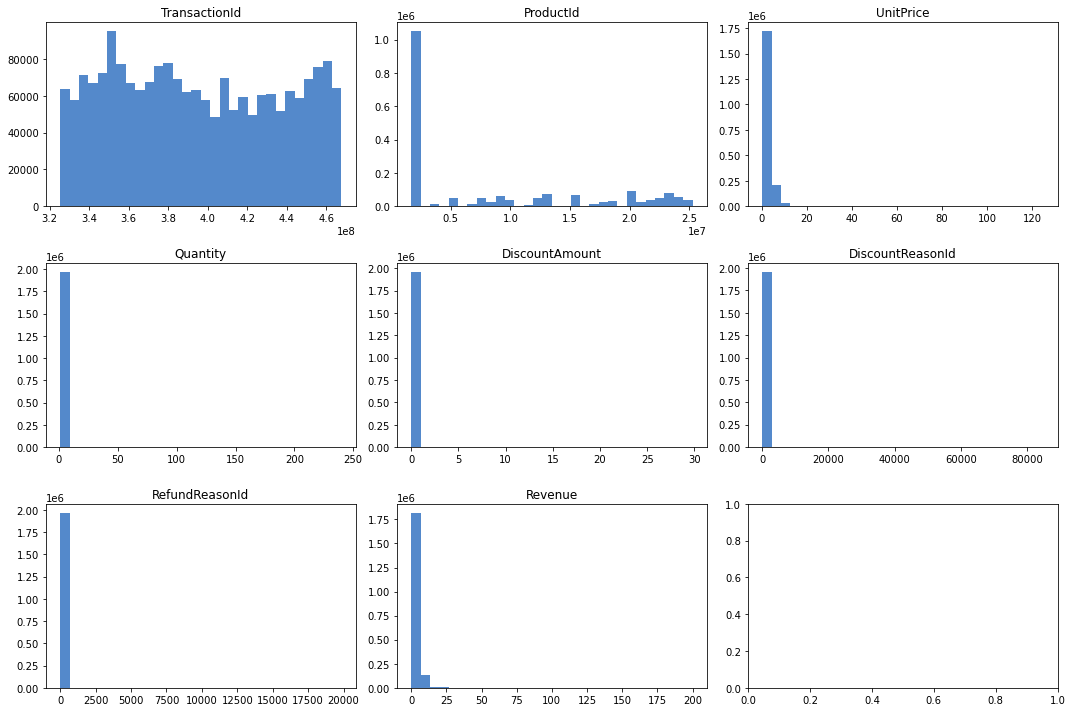

In [24]:
plt.subplots(3, 3, figsize=(15, 10))

count = 1

for col in combined_num.columns:
    plt.subplot(3, 3, count)
    plt.hist(combined_num[col], bins=30, color= bakery.light_magpie)
    plt.title(col)
    
    count += 1
    
plt.tight_layout()
plt.show()

### Observations 
- There is a range of `ProductId` that appears far more in the dataset than the rest (ID < 500,000)
- The majority of the procuts have a `UnitPrice` under £10
- Most transactions involve purchasing a `Quantity` less than 5 of any one product 
- The majority of transactions have a `DiscountAmount` are below £5 
- `Revenue` per transaction is mostly under £25 

## Exploration into The `Revenue` Change over Time
As one of the models being developed is forecasting product quantities, this column will be reviewed further to identify trends, any seasonal trends or relationships with external datasets such as weather and CPI data. An initial hypothesis about the trends can then be developed and tested in the modelling phase.  

To assess this, the weather and CPI data needs to merged with the `combined_clean` dataset, with the `Date` column set to DateTime and indexed. 

In [25]:
bakery.convert_date(combined_clean)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970433 entries, 0 to 1979120
Data columns (total 11 columns):
 #   Column            Dtype         
---  ------            -----         
 0   TransactionId     int64         
 1   ProductId         int64         
 2   UnitPrice         float64       
 3   Quantity          int64         
 4   DiscountAmount    float64       
 5   DiscountReasonId  float64       
 6   RefundReasonId    float64       
 7   Date              datetime64[ns]
 8   Revenue           float64       
 9   ShopId            object        
 10  Name              object        
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 180.4+ MB


None

## Monthly Total Revenue Over Time
To assess the general trend of revenue over time, the sum of the monthly revenue will be plotted to see how it has changed over the last 2 years. A copy of the data is made a stored to `combined_monthly`, which will have the data resampled to be on a monthly basis. 

In [26]:
combined_monthly = combined_clean.copy()
combined_monthly = combined_monthly.set_index('Date').copy()

# Resampling the index to be on a montly scale so the total revenue each month can be plotted
combined_monthly = combined_monthly.resample('MS').sum()

In [27]:
combined_monthly

TransactionId      ProductId  UnitPrice  Quantity  \
Date                                                             
2020-09-01  27715142229526   679544960326  234578.69     99951   
2020-10-01  27248818093146   647722659727  231204.09     96243   
2020-11-01  16098819355127   365963142074  130365.50     53730   
2020-12-01  18359892781822   447220948476  155432.88     60929   
2021-01-01  10105858079323   201571696854   80424.05     32824   
2021-02-01  10748115966396   220619777590   85562.45     34182   
2021-03-01  16084929096090   333970817657  125652.50     51084   
2021-04-01  27640430487790   622294594434  217252.45     90226   
2021-05-01  32474300192705   754024397933  260805.75    105992   
2021-06-01  33898622754823   770155063946  274725.35    111109   
2021-07-01  40240707299491   914243153442  331272.35    132892   
2021-08-01  47608857666644  1064026097257  380114.70    158435   
2021-09-01  35935506417892   764281886497  284907.90    112350   
2021-10-01  36354211335358   767236496471  286662.00    112068   
2021-11-01  29966828669020   642260496135  239810.95     88945   
2021-12-01  29653017530574   636320903500  245114.70     86679   
2022-01-01  29061096132167   579448869189  230959.00     82459   
2022-02-01  28259407575321   561871423195  216532.85     79199   
2022-03-01  29409675767509   585819458174  223579.60     80723   
2022-04-01  38021277908864   741895301417  313576.45    105275   
2022-05-01  35594164553445   685909918821  291245.35     94741   
2022-06-01  38189461031731   730291952244  304366.83    101336   
2022-07-01  46330245749626   879553159054  364392.30    121817   
2022-08-01  54808936587656  1052897161880  416481.40    145807   
2022-09-01  38394231675955   712908015525  293680.10     97050   

            DiscountAmount  DiscountReasonId  RefundReasonId    Revenue  
Date                                                                     
2020-09-01          657.95         7695492.0       1945780.0  271314.93  
2020-10-01          719.27         8628691.0       1823196.0  267385.25  
2020-11-01          749.52         7225587.0        810718.0  143635.13  
2020-12-01         1225.48         9338337.0       1161045.0  172578.22  
2021-01-01          597.66         4641566.0        424866.0   88514.74  
2021-02-01          378.25         3122752.0        554981.0   93187.80  
2021-03-01          720.41         5472583.0        663143.0  137440.44  
2021-04-01          879.42         7226045.0       1245670.0  245620.13  
2021-05-01          713.46         7704032.0       1815447.0  298999.79  
2021-06-01          485.34         6348099.0       2036001.0  321862.76  
2021-07-01          724.89        11141772.0       1827096.0  398044.01  
2021-08-01          800.70        11477136.0       1919544.0  468121.00  
2021-09-01          571.83        11763776.0       2769955.0  336931.17  
2021-10-01         1147.89        21479943.0       3009768.0  339983.66  
2021-11-01         1218.01        18333184.0       1328427.0  278913.34  
2021-12-01         1475.94        19101992.0       2394071.0  284362.66  
2022-01-01         1558.96        19251432.0       1858091.0  265070.84  
2022-02-01         1467.42        16824444.0       1588926.0  248737.03  
2022-03-01         1472.15        19017511.0       1905795.0  254795.10  
2022-04-01         1514.82        20787279.0       2027010.0  365684.13  
2022-05-01         1739.31        22455071.0       1676846.0  332789.82  
2022-06-01         1485.20        21129395.0       1618861.0  351262.48  
2022-07-01         2201.33        43411965.0       1572137.0  422977.42  
2022-08-01         1948.94        37450356.0       1992251.0  496394.56  
2022-09-01         1708.56        42869713.0       1865929.0  337767.29

In [28]:
# add lines for each column
fig = px.line(combined_monthly, x=combined_monthly.index, y=combined_monthly['Revenue'])


layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

# axis labels and title
fig.update_layout(
    yaxis_title='Revenue £', 
    title='There is an Upwards Trend in Total Monthly Revenue', plot_bgcolor='rgba(0,0,0,0)'
)

fig.write_image('rev.png', scale=2)

# activate slider
fig.update_xaxes(rangeslider_visible=True)

fig.show()

From the above graph there is a very clear upwards trend in revenue over the two years, and a distinct seasonal trend, with the peak revenue being in the summer months and dips in the winter months. To assess further, the total revenue per shop will be reviewed to see if this is the case for each shop. 

## Exploration of Total Monthly Revenue by Each Shop

In [29]:
# add lines for each column
fig = px.line(monthly_revenue, x=monthly_revenue.index, y=monthly_revenue.columns)


# layout = Layout(
#     paper_bgcolor='rgba(0,0,0,0)',
#     plot_bgcolor='rgba(0,0,0,0)'
# )

# axis labels and title
fig.update_layout(
    yaxis_title='Revenue £', 
    title='There is an Upwards Trend in Total Monthly Revenue'#, plot_bgcolor='rgba(0,0,0,0)'
)

fig.write_image('rev_by_shop_color.png', scale=2)

# activate slider
fig.update_xaxes(rangeslider_visible=True)

fig.show()

## Daily Total Revenue Over Time for Each Bakery

In [30]:
# To get the daily level of transactions
combined_by_shop = combined_clean.groupby(['Date','ShopId']).sum().copy()
combined_by_shop

TransactionId   ProductId  UnitPrice  Quantity  \
Date       ShopId                                                   
2020-09-01 ALD      352014195275  8124961171    3139.45      1309   
           DAR      262221263009  6458472177    2264.25       999   
           NOR       77428501468  1545569994     658.15       267   
           SW       275233279571  6811127814    2183.15      1043   
2020-09-02 ALD      340499233717  8415198472    2934.85      1233   
...                          ...         ...        ...       ...   
2022-09-29 SW       262183004397  4444244161    1865.10       659   
2022-09-30 ALD      383380687627  6969702190    3008.20       955   
           DAR      296888101064  5994770275    2491.60       755   
           NOR      239377054693  4441427643    1953.05       543   
           SW       321664959988  6017796158    2375.90       851   

                   DiscountAmount  DiscountReasonId  RefundReasonId  Revenue  
Date       ShopId                                                             
2020-09-01 ALD              24.50          222474.0         39500.0  3703.60  
           DAR               3.60           33139.0         39698.0  2712.05  
           NOR               2.80           19614.0             0.0   727.90  
           SW                1.94           33138.0             0.0  2637.21  
2020-09-02 ALD              13.20          179270.0             0.0  3402.15  
...                           ...               ...             ...      ...  
2022-09-29 SW               10.10          117217.0         19849.0  2144.95  
2022-09-30 ALD              11.12          483771.0             0.0  3441.63  
           DAR              30.55          401019.0             0.0  2836.55  
           NOR               3.95           19614.0         31122.0  2062.60  
           SW               16.41          423606.0             0.0  2842.54  

[2971 rows x 8 columns]

In [31]:
combined_by_shop = combined_by_shop.reset_index()
combined_by_shop = combined_by_shop.set_index('Date')

In [32]:
combined_by_shop

ShopId  TransactionId   ProductId  UnitPrice  Quantity  \
Date                                                                
2020-09-01    ALD   352014195275  8124961171    3139.45      1309   
2020-09-01    DAR   262221263009  6458472177    2264.25       999   
2020-09-01    NOR    77428501468  1545569994     658.15       267   
2020-09-01     SW   275233279571  6811127814    2183.15      1043   
2020-09-02    ALD   340499233717  8415198472    2934.85      1233   
...           ...            ...         ...        ...       ...   
2022-09-29     SW   262183004397  4444244161    1865.10       659   
2022-09-30    ALD   383380687627  6969702190    3008.20       955   
2022-09-30    DAR   296888101064  5994770275    2491.60       755   
2022-09-30    NOR   239377054693  4441427643    1953.05       543   
2022-09-30     SW   321664959988  6017796158    2375.90       851   

            DiscountAmount  DiscountReasonId  RefundReasonId  Revenue  
Date                                                                   
2020-09-01           24.50          222474.0         39500.0  3703.60  
2020-09-01            3.60           33139.0         39698.0  2712.05  
2020-09-01            2.80           19614.0             0.0   727.90  
2020-09-01            1.94           33138.0             0.0  2637.21  
2020-09-02           13.20          179270.0             0.0  3402.15  
...                    ...               ...             ...      ...  
2022-09-29           10.10          117217.0         19849.0  2144.95  
2022-09-30           11.12          483771.0             0.0  3441.63  
2022-09-30           30.55          401019.0             0.0  2836.55  
2022-09-30            3.95           19614.0         31122.0  2062.60  
2022-09-30           16.41          423606.0             0.0  2842.54  

[2971 rows x 9 columns]

In [33]:
# add lines for each column
fig = px.line(combined_by_shop, x=combined_by_shop.index, y=combined_by_shop['Revenue'], color='ShopId')

# axis labels and title
fig.update_layout(
    yaxis_title="Revenue (£)", 
    legend_title="", 
    title="Daily Revenue Across Four Bakeries"
)

# activate slider
fig.update_xaxes(rangeslider_visible=True)

fig.show()

In [34]:
temp = combined_by_shop.copy()
temp.resample('MS').sum()


TransactionId      ProductId  UnitPrice  Quantity  \
Date                                                             
2020-09-01  27715142229526   679544960326  234578.69     99951   
2020-10-01  27248818093146   647722659727  231204.09     96243   
2020-11-01  16098819355127   365963142074  130365.50     53730   
2020-12-01  18359892781822   447220948476  155432.88     60929   
2021-01-01  10105858079323   201571696854   80424.05     32824   
2021-02-01  10748115966396   220619777590   85562.45     34182   
2021-03-01  16084929096090   333970817657  125652.50     51084   
2021-04-01  27640430487790   622294594434  217252.45     90226   
2021-05-01  32474300192705   754024397933  260805.75    105992   
2021-06-01  33898622754823   770155063946  274725.35    111109   
2021-07-01  40240707299491   914243153442  331272.35    132892   
2021-08-01  47608857666644  1064026097257  380114.70    158435   
2021-09-01  35935506417892   764281886497  284907.90    112350   
2021-10-01  36354211335358   767236496471  286662.00    112068   
2021-11-01  29966828669020   642260496135  239810.95     88945   
2021-12-01  29653017530574   636320903500  245114.70     86679   
2022-01-01  29061096132167   579448869189  230959.00     82459   
2022-02-01  28259407575321   561871423195  216532.85     79199   
2022-03-01  29409675767509   585819458174  223579.60     80723   
2022-04-01  38021277908864   741895301417  313576.45    105275   
2022-05-01  35594164553445   685909918821  291245.35     94741   
2022-06-01  38189461031731   730291952244  304366.83    101336   
2022-07-01  46330245749626   879553159054  364392.30    121817   
2022-08-01  54808936587656  1052897161880  416481.40    145807   
2022-09-01  38394231675955   712908015525  293680.10     97050   

            DiscountAmount  DiscountReasonId  RefundReasonId    Revenue  
Date                                                                     
2020-09-01          657.95         7695492.0       1945780.0  271314.93  
2020-10-01          719.27         8628691.0       1823196.0  267385.25  
2020-11-01          749.52         7225587.0        810718.0  143635.13  
2020-12-01         1225.48         9338337.0       1161045.0  172578.22  
2021-01-01          597.66         4641566.0        424866.0   88514.74  
2021-02-01          378.25         3122752.0        554981.0   93187.80  
2021-03-01          720.41         5472583.0        663143.0  137440.44  
2021-04-01          879.42         7226045.0       1245670.0  245620.13  
2021-05-01          713.46         7704032.0       1815447.0  298999.79  
2021-06-01          485.34         6348099.0       2036001.0  321862.76  
2021-07-01          724.89        11141772.0       1827096.0  398044.01  
2021-08-01          800.70        11477136.0       1919544.0  468121.00  
2021-09-01          571.83        11763776.0       2769955.0  336931.17  
2021-10-01         1147.89        21479943.0       3009768.0  339983.66  
2021-11-01         1218.01        18333184.0       1328427.0  278913.34  
2021-12-01         1475.94        19101992.0       2394071.0  284362.66  
2022-01-01         1558.96        19251432.0       1858091.0  265070.84  
2022-02-01         1467.42        16824444.0       1588926.0  248737.03  
2022-03-01         1472.15        19017511.0       1905795.0  254795.10  
2022-04-01         1514.82        20787279.0       2027010.0  365684.13  
2022-05-01         1739.31        22455071.0       1676846.0  332789.82  
2022-06-01         1485.20        21129395.0       1618861.0  351262.48  
2022-07-01         2201.33        43411965.0       1572137.0  422977.42  
2022-08-01         1948.94        37450356.0       1992251.0  496394.56  
2022-09-01         1708.56        42869713.0       1865929.0  337767.29

From the above figure, again the general upwards trend of revenue over the two years can be seen. For the bakeries: `Aldeburgh`, `Darsham` and `Southwold` the distinct seasonal trend is also seen. For `Norwich` the seasonal pattern is far weaker. On theory for this is that the locations of shops are different. `Aldeburgh`, `Darsham` and `Southwold` are all located near the seaside, whereas `Norwich` is located in a City, therefore they ones located by the seaside would have a greater seasonal pattern as people visit the beach at different times of the year, compared to a cafe in a City.

However, it is clear that all four shops do have a general upwards trend in revenue and a seasonal pattern. 

---

# Exploration into The Categorical Columns
Next the categorical columns will be reviewed to identify any trends that could lead to insights and areas of exploration in the modelling. 

In [35]:
combined_cat = combined_clean.select_dtypes('object').copy()
combined_cat

ShopId                        Name
0          ALD  BLUEBERRY & LEMON CAKE T/O
1          ALD          FLAT WHITE REG E/I
2          ALD                SPELT & CHIA
3          ALD                AMARETTI T/O
4          ALD     TIRAMISU CAKE SLICE T/O
...        ...                         ...
1979116    DAR                  DIABLO T/O
1979117    DAR                    BAGUETTE
1979118    DAR   CHOCOLATE POT DESSERT T/O
1979119    DAR           THE GREEN MAN T/O
1979120    DAR            THE LOMBARDY T/O

[1970433 rows x 2 columns]

To determine what are the top and bottom 10 selling products overall, the `top_bottom_products` function in usedm which counts the number of transactions per product and returns the top 10 and bottom 10 selling. 

In [36]:
bakery.top_bottom_products(combined_cat, 'all shops')

The top 10 selling products at all shops are: 
SAUSAGE ROLL T/O          76878
FLAT WHITE REG T/O        61917
MAGPIE SOURDOUGH LARGE    56736
CINNAMON SWIRLS T/O       45060
LATTE LARGE T/O           44488
CUSTARD TART T/O          38280
CHEESE STRAW T/O          36704
BAKEWELL T/O              36576
CROISSANT T/O             35245
AMARETTI T/O              33781
Name: Name, dtype: int64

The bottom 10 selling products at all shops are: 
BREAD & BUTTER              1
^^CHAI LATTE LRG            1
TIRAMISU 10"                1
^^ RADISH SALAD             1
ALLPRESS PUD DESSERT E/I    1
VEGAN CELERIAC PIZZA T/O    1
GINGER LOAF T/O             1
^^ HOUSE WHITE 175ML        1
^^ MOCHA REG                1
BLACK MAGIC 10"             1
Name: Name, dtype: int64


### Observations
- The top 10 selling products are all Take Out products 
    > - This could be due to the data starting in September 2020, which is only recently post the Covid pandemic and only 3 months after being allowed to eat in cafes again, which could be skewing the results as customers were not as comfortable to sit in cafes 
    > - Another hypothesis 3 our of the 4 bakeries in the dataset are located by the beach, perhaps customers prefer buying their products and eating them on the beach
    > - Further anaylysis into Eat In vs Take Out would be required to determine the reason. However, for this project the focus is on prediciting total sales, regardless on whether they are Eat In or Take Out, this will not be explored in depth for this analysis
- The majority of the top 10 selling prodcuts are products that have been selected for the forecasting model as they are the most difficult to predict. This emphasises the importance and necessity for an accurate forecast as they are the most in demand products, therefore sales and hence revenue could be lost if the forecast is incorrect
- The bottom 10 selling products appear to be either seasonal or retail products (whole cakes) and therefore are likely to have lower sales 

## Analysis into Top and Bottom Selling Products for Each Shop
To confirm the correct top products have been selected for forecasting the top and bottom 10 products will be identified for each shop to ensure that it is not one shop with a larger number of sales skewing the results. 

In [37]:
aldeburgh_clean = combined_clean[combined_clean['ShopId']=='ALD']
southwold_clean = combined_clean[combined_clean['ShopId']=='SW']
darsham_clean = combined_clean[combined_clean['ShopId']=='DAR']
norwich_clean = combined_clean[combined_clean['ShopId']=='NOR']

In [38]:
bakery.top_bottom_products(aldeburgh_clean, 'Aldeburgh')
print('')
bakery.top_bottom_products(southwold_clean, 'Southwold')
print('')
bakery.top_bottom_products(darsham_clean, 'Darsham')
print('')
bakery.top_bottom_products(norwich_clean, 'Norwich')

The top 10 selling products at Aldeburgh are: 
SAUSAGE ROLL T/O          24177
FLAT WHITE REG T/O        23320
MAGPIE SOURDOUGH LARGE    17087
CINNAMON SWIRLS T/O       14388
LATTE LARGE T/O           12573
CROISSANT T/O             12262
CUSTARD TART T/O          11977
LATTE REG T/O             11855
BAKEWELL T/O              11778
AMARETTI T/O              10870
Name: Name, dtype: int64

The bottom 10 selling products at Aldeburgh are: 
VIRGIN BLOODY MARY             1
CHOCOLATE SWIRL T/O            1
SAUSAGE ROLL X 4 MULTI         1
Mango & Lime Cake Slice T/O    1
BUMBLE ZEST CAN T/O            1
^^ CARTON BERRY                1
^^ VEGGIE BOARD                1
^^ MEAT BOARD                  1
TENDERSTEAM SALAD T/O          1
Tiger prawn brioche            1
Name: Name, dtype: int64

The top 10 selling products at Southwold are: 
SAUSAGE ROLL T/O          25238
FLAT WHITE REG T/O        20836
MAGPIE SOURDOUGH LARGE    18626
CINNAMON SWIRLS T/O       15978
LATTE LARGE T/O           

### Observations
- The top 10 selling products for `Aldeburgh`, `Southwold` and `Darsham` are all Take Out products 
    > - As these three bakeries are located by the seaside, this strengthens the hypothesis that customers are purchasing take away products to enjoy on the beach 
- `Norwich` has the majority of the top 10 selling products as Eat In. This is most likely due to it being located in a City, therefore people prefer to sit down and have a coffee inside than taking it away 
- The majority of the top 10 selling prodcuts across all the shops are products that have been selected for the forecasting model, validating that they have been selected correctly to forecast
- The bottom 10 selling products across all shops appear to be either seasonal or retail products (whole cakes) and therefore are likely to have lower sales 
- All shops seem appear to have the same product preferences so can be assumed to have similar customers with similar demands. 

# Part 2 : EDA on The Revenue Against Independent Variables
Now .....**UPDATE**

As it appears from the inital EDA that all the shops behave quite similarly (they have the same seasonal and upwards trend, and the majority of the same top and bottom selling products) for the remainder of the EDA the total quantity and total revenue will be explored.

## Importing Total Revenue Dataset

In [39]:
total_rev = pd.read_csv(working_directory+'/5_timeseries_data/total_revenue.csv', index_col=0)
total_rev.index = pd.to_datetime(total_rev.index)
display(total_rev.head())

Total_Revenue      Day  TAVG  PRCP  CPI_Electricity  CPI_Food
2020-09-01        9780.76  Weekday  24.0  0.00            107.6     102.8
2020-09-02       10037.55  Weekday  27.0  0.00            107.6     102.8
2020-09-03        9419.30  Weekday  31.0  0.07            107.6     102.8
2020-09-04       10606.15  Weekday  27.0  0.08            107.6     102.8
2020-09-05       12922.00  Weekend  23.0  0.01            107.6     102.8

In [40]:
total_rev_encoded = pd.read_csv(working_directory+'/5_timeseries_data/total_revenue_encoded.csv', index_col=0)
total_rev_encoded.index = pd.to_datetime(total_rev_encoded.index)
display(total_rev_encoded.head())

Total_Revenue  TAVG  PRCP  CPI_Electricity  CPI_Food  \
2020-09-01        9780.76  24.0  0.00            107.6     102.8   
2020-09-02       10037.55  27.0  0.00            107.6     102.8   
2020-09-03        9419.30  31.0  0.07            107.6     102.8   
2020-09-04       10606.15  27.0  0.08            107.6     102.8   
2020-09-05       12922.00  23.0  0.01            107.6     102.8   

            Bank_Holiday  Closed_Xmas  School_Holiday  Weekday  Weekend  
2020-09-01             0            0               0        1        0  
2020-09-02             0            0               0        1        0  
2020-09-03             0            0               0        1        0  
2020-09-04             0            0               0        1        0  
2020-09-05             0            0               0        0        1

# Exploration of `Revenue` Against Independent Variables 
To try and determine which independent variables would be good predictors for forecasting `Revenue`, their correlation and trends with `Revenue` will be explored. 

First to get an initial understanding on whether there is a trend, a `regplot` for each independent variable against `Total_Revenue` will be plotted. 

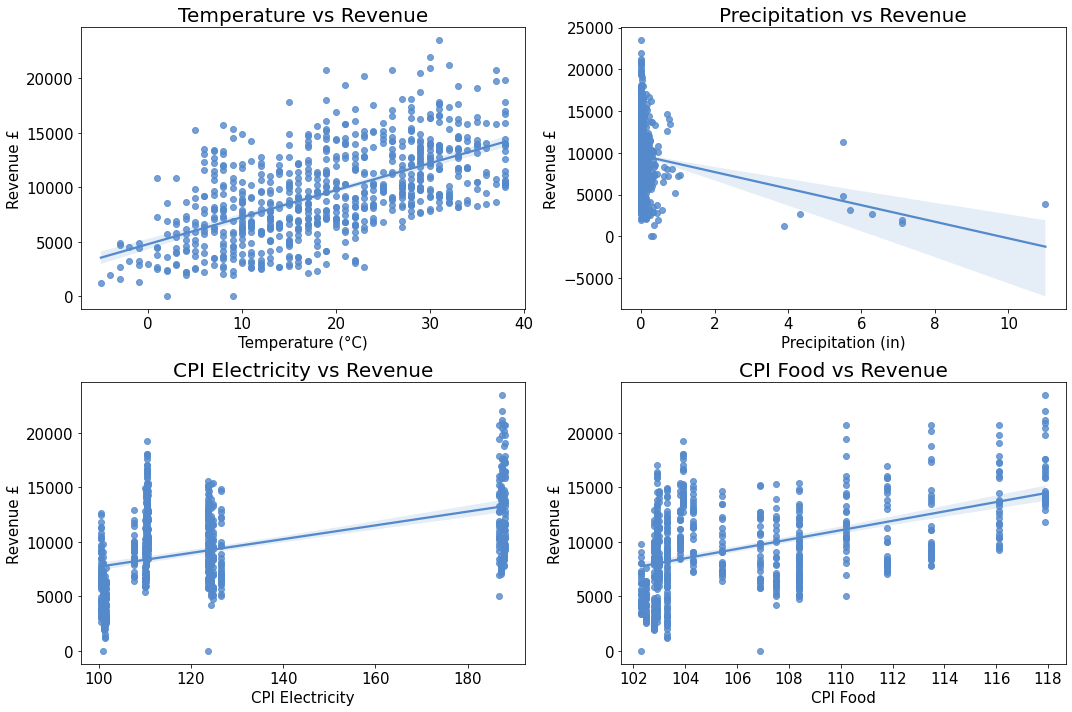

In [41]:
# To plot four regplots, one for each idependent variable against revenue
plt.subplots(2,2, figsize=(15,10))

# Plots average temperature against revenue
plt.subplot(2,2,1)
bakery.plot_regplot(total_rev, 'Total_Revenue', 'TAVG','Temperature vs Revenue', 'Revenue £', 'Temperature (°C)')

# Plots average precipitation against revenue
plt.subplot(2,2,2)
bakery.plot_regplot(total_rev, 'Total_Revenue', 'PRCP','Precipitation vs Revenue', 'Revenue £', 'Precipitation (in)')

# Plots average CPI_Electricity against revenue
plt.subplot(2,2,3)
bakery.plot_regplot(total_rev, 'Total_Revenue', 'CPI_Electricity','CPI Electricity vs Revenue',
             'Revenue £', 'CPI Electricity')

# Plots average CPI_Food against revenue
plt.subplot(2,2,4)
bakery.plot_regplot(total_rev, 'Total_Revenue', 'CPI_Food','CPI Food vs Revenue', 'Revenue £', 'CPI Food')

plt.tight_layout()  # makes sure there is no overlap in plots

plt.show()

### Observations
- There is a strong positive correlation between temperature and revnue
- There is a weak negative correlation between precipitation and revenue 
- There is a weak positive correaltion between CPI electricity and revenue 
- There is a positive correlation between CPI food and revenue 

To further understand these correlations and quantify them, a heat map of the pearsons correlation between revenue and each independent variable is plotted. 

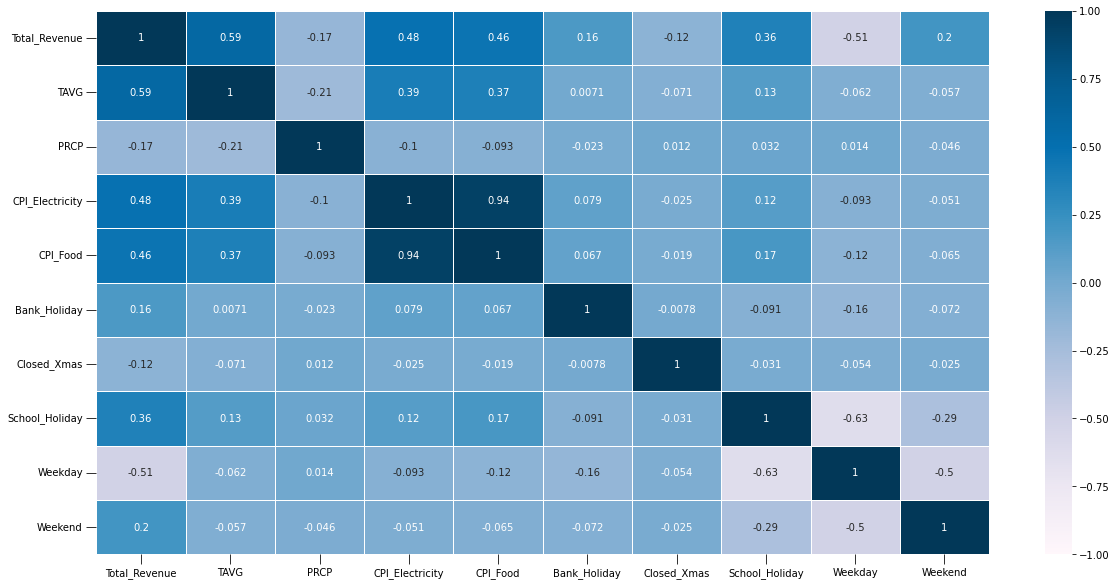

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(total_rev_encoded.corr(),
            cmap='PuBu',vmin=-1, vmax=1, annot=True, lw=1)
plt.tick_params(size=10)
plt.show()

### Observations
- The strongest correlation with total revenue is the average temperature. This seems reasonable as it is known that most the bakeries are located by the seaside and people generally prefer going to the seaside when the weather is warmer 
- CPI electricity and CPI food have a reasonable correlation with the total revenue. However, they are extremely correlated to each other, therefore one of the variables would have to be excluded from any modelling to reduce multicollinearity
- Precipitation has little to no correlation with the total revenue, therefore it is unlikely that revenue is dependent on precipitation levels

To further explore the relationship, line graphs will be plotted to show the change in revenue over time against each of these independent variables. For this the index will be resampled to show the sum of the monthly revenue against average temperature, precipitation and CPI values. For this the dataset has to be split into two so the revenue can be summed and the independent variables can have the mean calculated. These two dataframe will then be concatonated back together. 

In [43]:
total_rev

Total_Revenue      Day  TAVG  PRCP  CPI_Electricity  CPI_Food
2020-09-01        9780.76  Weekday  24.0  0.00            107.6     102.8
2020-09-02       10037.55  Weekday  27.0  0.00            107.6     102.8
2020-09-03        9419.30  Weekday  31.0  0.07            107.6     102.8
2020-09-04       10606.15  Weekday  27.0  0.08            107.6     102.8
2020-09-05       12922.00  Weekend  23.0  0.01            107.6     102.8
...                   ...      ...   ...   ...              ...       ...
2022-09-26        9932.92  Weekday  20.0  0.09              NaN       NaN
2022-09-27        9718.01  Weekday  16.0  0.04              NaN       NaN
2022-09-28        8069.91  Weekday  16.0  0.15              NaN       NaN
2022-09-29        7877.02  Weekday  18.0  0.01              NaN       NaN
2022-09-30       11183.32  Weekday  18.0  0.01              NaN       NaN

[760 rows x 6 columns]

In [44]:
total_rev_only = total_rev['Total_Revenue'].copy()
independent_variables = total_rev[['Day', 'TAVG', 'PRCP', 'CPI_Electricity', 'CPI_Food']].copy()

In [45]:
# To resample the revenue to show the sum of revenue for each month 
total_rev_only = total_rev_only.resample('MS').sum()
# to resample the independent variables to show the mean for each month
independent_variables = independent_variables.resample('MS').mean()

In [46]:
total_rev_monthly = pd.concat([total_rev_only, independent_variables], axis=1)
total_rev_monthly

Total_Revenue       TAVG      PRCP  CPI_Electricity  CPI_Food
2020-09-01  271314.930000  26.300000  0.077667            107.6     102.8
2020-10-01  267385.250000  19.064516  0.142581            100.6     102.9
2020-11-01  143635.130000  15.533333  0.054000            100.5     102.9
2020-12-01  173145.725556   9.064516  0.144516            100.9     102.3
2021-01-01   95207.984444   5.290323  0.107742            101.1     102.8
2021-02-01   96001.300000   8.821429  1.853214            101.4     103.3
2021-03-01  137440.440000  11.741935  0.040645            101.5     102.5
2021-04-01  247417.530000  10.600000  0.002333            110.1     103.3
2021-05-01  298999.790000  18.161290  0.091935            110.2     103.0
2021-06-01  321862.760000  28.800000  0.055667            110.3     103.3
2021-07-01  398044.010000  30.838710  0.055161            110.5     102.9
2021-08-01  468121.000000  28.870968  0.025484            110.4     103.9
2021-09-01  336931.170000  29.133333  0.016667            110.6     103.8
2021-10-01  346774.240000  21.064516  0.299355            123.7     104.3
2021-11-01  278913.340000  12.900000  0.035000            123.9     105.4
2021-12-01  285428.485000  11.354839  0.085484            123.8     106.9
2022-01-01  265070.840000   7.838710  0.014194            124.3     107.5
2022-02-01  248737.030000  11.678571  0.080000            124.8     108.4
2022-03-01  266550.350000  13.322581  0.034516            126.6     108.4
2022-04-01  365684.130000  15.900000  0.019333            186.7     110.2
2022-05-01  332789.820000  23.451613  0.042903            187.3     111.8
2022-06-01  351262.480000  27.900000  0.061667            187.8     113.5
2022-07-01  422977.420000  33.193548  0.003871            188.1     116.1
2022-08-01  496394.560000  34.322581  0.006452            187.4     117.9
2022-09-01  350491.425000  26.133333  0.043000              NaN       NaN

In [48]:
layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

revenue = total_rev_monthly['Total_Revenue']
# Set up the Figure 
fig = make_subplots(specs=[[{"secondary_y": True}]])

variable = total_rev_monthly['TAVG']
# Create the graph data objects
chart_data1 = go.Scatter(x=total_rev_monthly.index,y=revenue, 
                         name='Revenue')
chart_data2 = go.Scatter(x=total_rev_monthly.index,y=variable, 
                         name='Avg Temp (°C)')
# Use add_trace()
fig.add_trace(chart_data1)
fig.add_trace(chart_data2, secondary_y=True)
# Create the layout object and add it to the figure
chart_layout = go.Layout(title='There is a Strong Correlation Between Revenue and Average Temperature',
                        xaxis_title='Date', yaxis_title='Revenue £')
fig.update_yaxes(title_text='Average Temperature (°C)', secondary_y=True)
fig.update_layout(chart_layout, plot_bgcolor='rgba(0,0,0,0)')
fig.write_image('T_blank.png', scale=2)
fig.show()


In [49]:
bakery.plot_rev_lines(total_rev_monthly, 'TAVG', 'There is a Strong Correlation Between Revenue and Avg Temperature',
               'Average Temperature (°C)')

bakery.plot_rev_lines(total_rev_monthly, 'PRCP', 'There is a Weak Correlation Between Revenue and Precipitation',
               'Average Precipitation (in)')

bakery.plot_rev_lines(total_rev_monthly, 'CPI_Electricity',
               'There is Some Correlation Between Revenue and CPI Electricity', 'CPI Electricity')

bakery.plot_rev_lines(total_rev_monthly, 'CPI_Food',
               'There is Some Correlation Between Revenue and CPI Food', 'CPI Food')

## Oberservations
- Temperature has the greatest correlation to total revenue, with the trend lines being practically on top of each other. This suggests that temperature could be a good predictor for total revenue forecasting.
- Precipitation has a weak correlation to total revenue, so would be a poor predictor of total revenue.
- Both CPI Electricity and CPI Food have a strong correlation to total revenue post January 2022, however are poorly correlated before then. 

Therefore, for the modelling phase of this project, the average daily temperature will be taken forward as an external variable to see if it is a good predictor for revenue forecasting. 

## Exploring the Day Against Revenue
To determine whether a model such as Prophet is required or whether ARIMA is sufficient, the type of day (e.g. weekday, weekend, bank holiday etc) will be plotted against the total revenue to determine if there is a correlation. 

First the average revenue will be determined for each `Day`, by taking a copy of the dataset called `special_dates_rev`. The data will then be grouped by the `Day` column and the mean taken. 

In [50]:
special_dates_rev = total_rev[['Day', 'Total_Revenue']].copy()
special_dates_rev = round(special_dates_rev.groupby('Day').mean(),2)
special_dates_rev.sort_values('Total_Revenue', ascending=False)

Total_Revenue
Day                          
Bank Holiday         13865.68
School Holiday       12045.26
Weekend              11284.08
Weekday               7554.44
Closed - Xmas            0.00

It is evident from the above table that `Bank Holiday` and `School Holiday` days bring in the most revenue on average compared to non-school holidays. In addition to this, it can be seen that `Weekend` days bring in more revenue than `Weekday` days. To further visualise this trend, the revenue by `Day` is plotted as a scatterplot below. 

In [51]:
# Plotting a scatter plot of total revenue over time with a different colour for each day type 
fig = px.scatter(total_rev, x=total_rev.index, y=total_rev['Total_Revenue'], color='Day')

# To add axis labels and title
fig.update_layout(
    yaxis_title='Revenue (£)', 
    xaxis_title = 'Date',
    legend_title='', 
    title='Daily Revenue by Day Type', plot_bgcolor='rgba(0,0,0,0)'
)
fig.write_image('dayblank.png', scale=2)

# To sactivate slider
fig.update_xaxes(rangeslider_visible=True)

fig.show()

In [52]:
revenue = total_rev_monthly['Total_Revenue']
# Set up the Figure 
fig = make_subplots(specs=[[{"secondary_y": True}]])

variable = total_rev_monthly['TAVG']
# Create the graph data objects
chart_data1 = go.Scatter(x=total_rev_monthly.index,y=revenue, 
                         name='Revenue (£)')
chart_data2 = go.Scatter(x=total_rev_monthly.index,y=variable, 
                         name='Avg Temp (°C)')
# Use add_trace()
fig.add_trace(chart_data1)
fig.add_trace(chart_data2, secondary_y=True)
# Create the layout object and add it to the figure
chart_layout = go.Layout(title='There is a Strong Correlation Between Revenue and Avg Temperature',
                        xaxis_title='Date', yaxis_title='Revenue £')
fig.update_yaxes(title_text='Average Temperature (°C)', secondary_y=True)
fig.update_layout(chart_layout)
fig.write_image('tavg.png', scale=2)

# pio.write_image(fig, "day.svg", width=1.5*300, height=0.75*300, scale=2)
fig.show()

## Observations
From the above table showing the mean revenue for each `Day` type and the scatter plot, it is evident that the type of day has an affect on the revenue being made. Therefore, it can be concluded that Prophet modelling could be a suitable option. 

# Part 3 : EDA on The Product Trends 
The top products identified below were selected by the business as they are known to be the most in demand (validated above in the exploration into the category columns) and the most difficult to predict the number of sales. Therefore, developing an accurate forecasting model is essential as to not lose potential sales. 

The steps taken in this analysis are summarised in the below flow chart. 

**FLOW CHART**

First an exploration into their sales over time will be assessed, to identify if there are any trends or seasonal patterns. 

## Importing Quantity Dataset

In [53]:
total_quantity = pd.read_csv(working_directory+'/3_preprocessed_data/total_quantity_processed.csv', index_col=0)
total_quantity.index = pd.to_datetime(total_quantity.index)
display(total_quantity.head())

Almond Toast  Baguette  Bakewell  Cheese & Tomato Melt  \
2020-09-01          13.0      65.0      87.0                  12.0   
2020-09-02          13.0      63.0      75.0                   9.0   
2020-09-03          40.0      59.0      67.0                   5.0   
2020-09-04           1.0      54.0      70.0                   6.0   
2020-09-05          13.0      94.0      84.0                  13.0   

            Cheese Scone  Cheese Straw  Cinnamon Swirl  Coffee  Croissant  \
2020-09-01          52.0         118.0           119.0   681.0      102.0   
2020-09-02          62.0          58.0           122.0   687.0       22.0   
2020-09-03          56.0          80.0           115.0   667.0      136.0   
2020-09-04          55.0          74.0           114.0   748.0      121.0   
2020-09-05          61.0         124.0           119.0   825.0      152.0   

            Croque Monsieur  ...  Magpie Sourdough  Moroccan Vegan Roll  \
2020-09-01             20.0  ...             104.0                 59.0   
2020-09-02             11.0  ...             108.0                 83.0   
2020-09-03             11.0  ...              96.0                 51.0   
2020-09-04             20.0  ...             132.0                 54.0   
2020-09-05             13.0  ...             114.0                106.0   

            Pain Au Chocolate  Sausage Roll    Tea      Day  TAVG  PRCP  \
2020-09-01               99.0         211.0   82.0  Weekday  24.0  0.00   
2020-09-02               87.0         225.0  103.0  Weekday  27.0  0.00   
2020-09-03              110.0         191.0   93.0  Weekday  31.0  0.07   
2020-09-04               98.0         193.0  114.0  Weekday  27.0  0.08   
2020-09-05               98.0         272.0  129.0  Weekend  23.0  0.01   

            CPI_Electricity  CPI_Food  
2020-09-01            107.6     102.8  
2020-09-02            107.6     102.8  
2020-09-03            107.6     102.8  
2020-09-04            107.6     102.8  
2020-09-05            107.6     102.8  

[5 rows x 25 columns]

In [54]:
# A new copy of the dataset is made with only the product columns 
product_df_daily = total_quantity.drop(columns=['Day', 'TAVG', 'PRCP', 'CPI_Electricity', 'CPI_Food']).copy()
product_df = product_df_daily.resample('MS').sum()

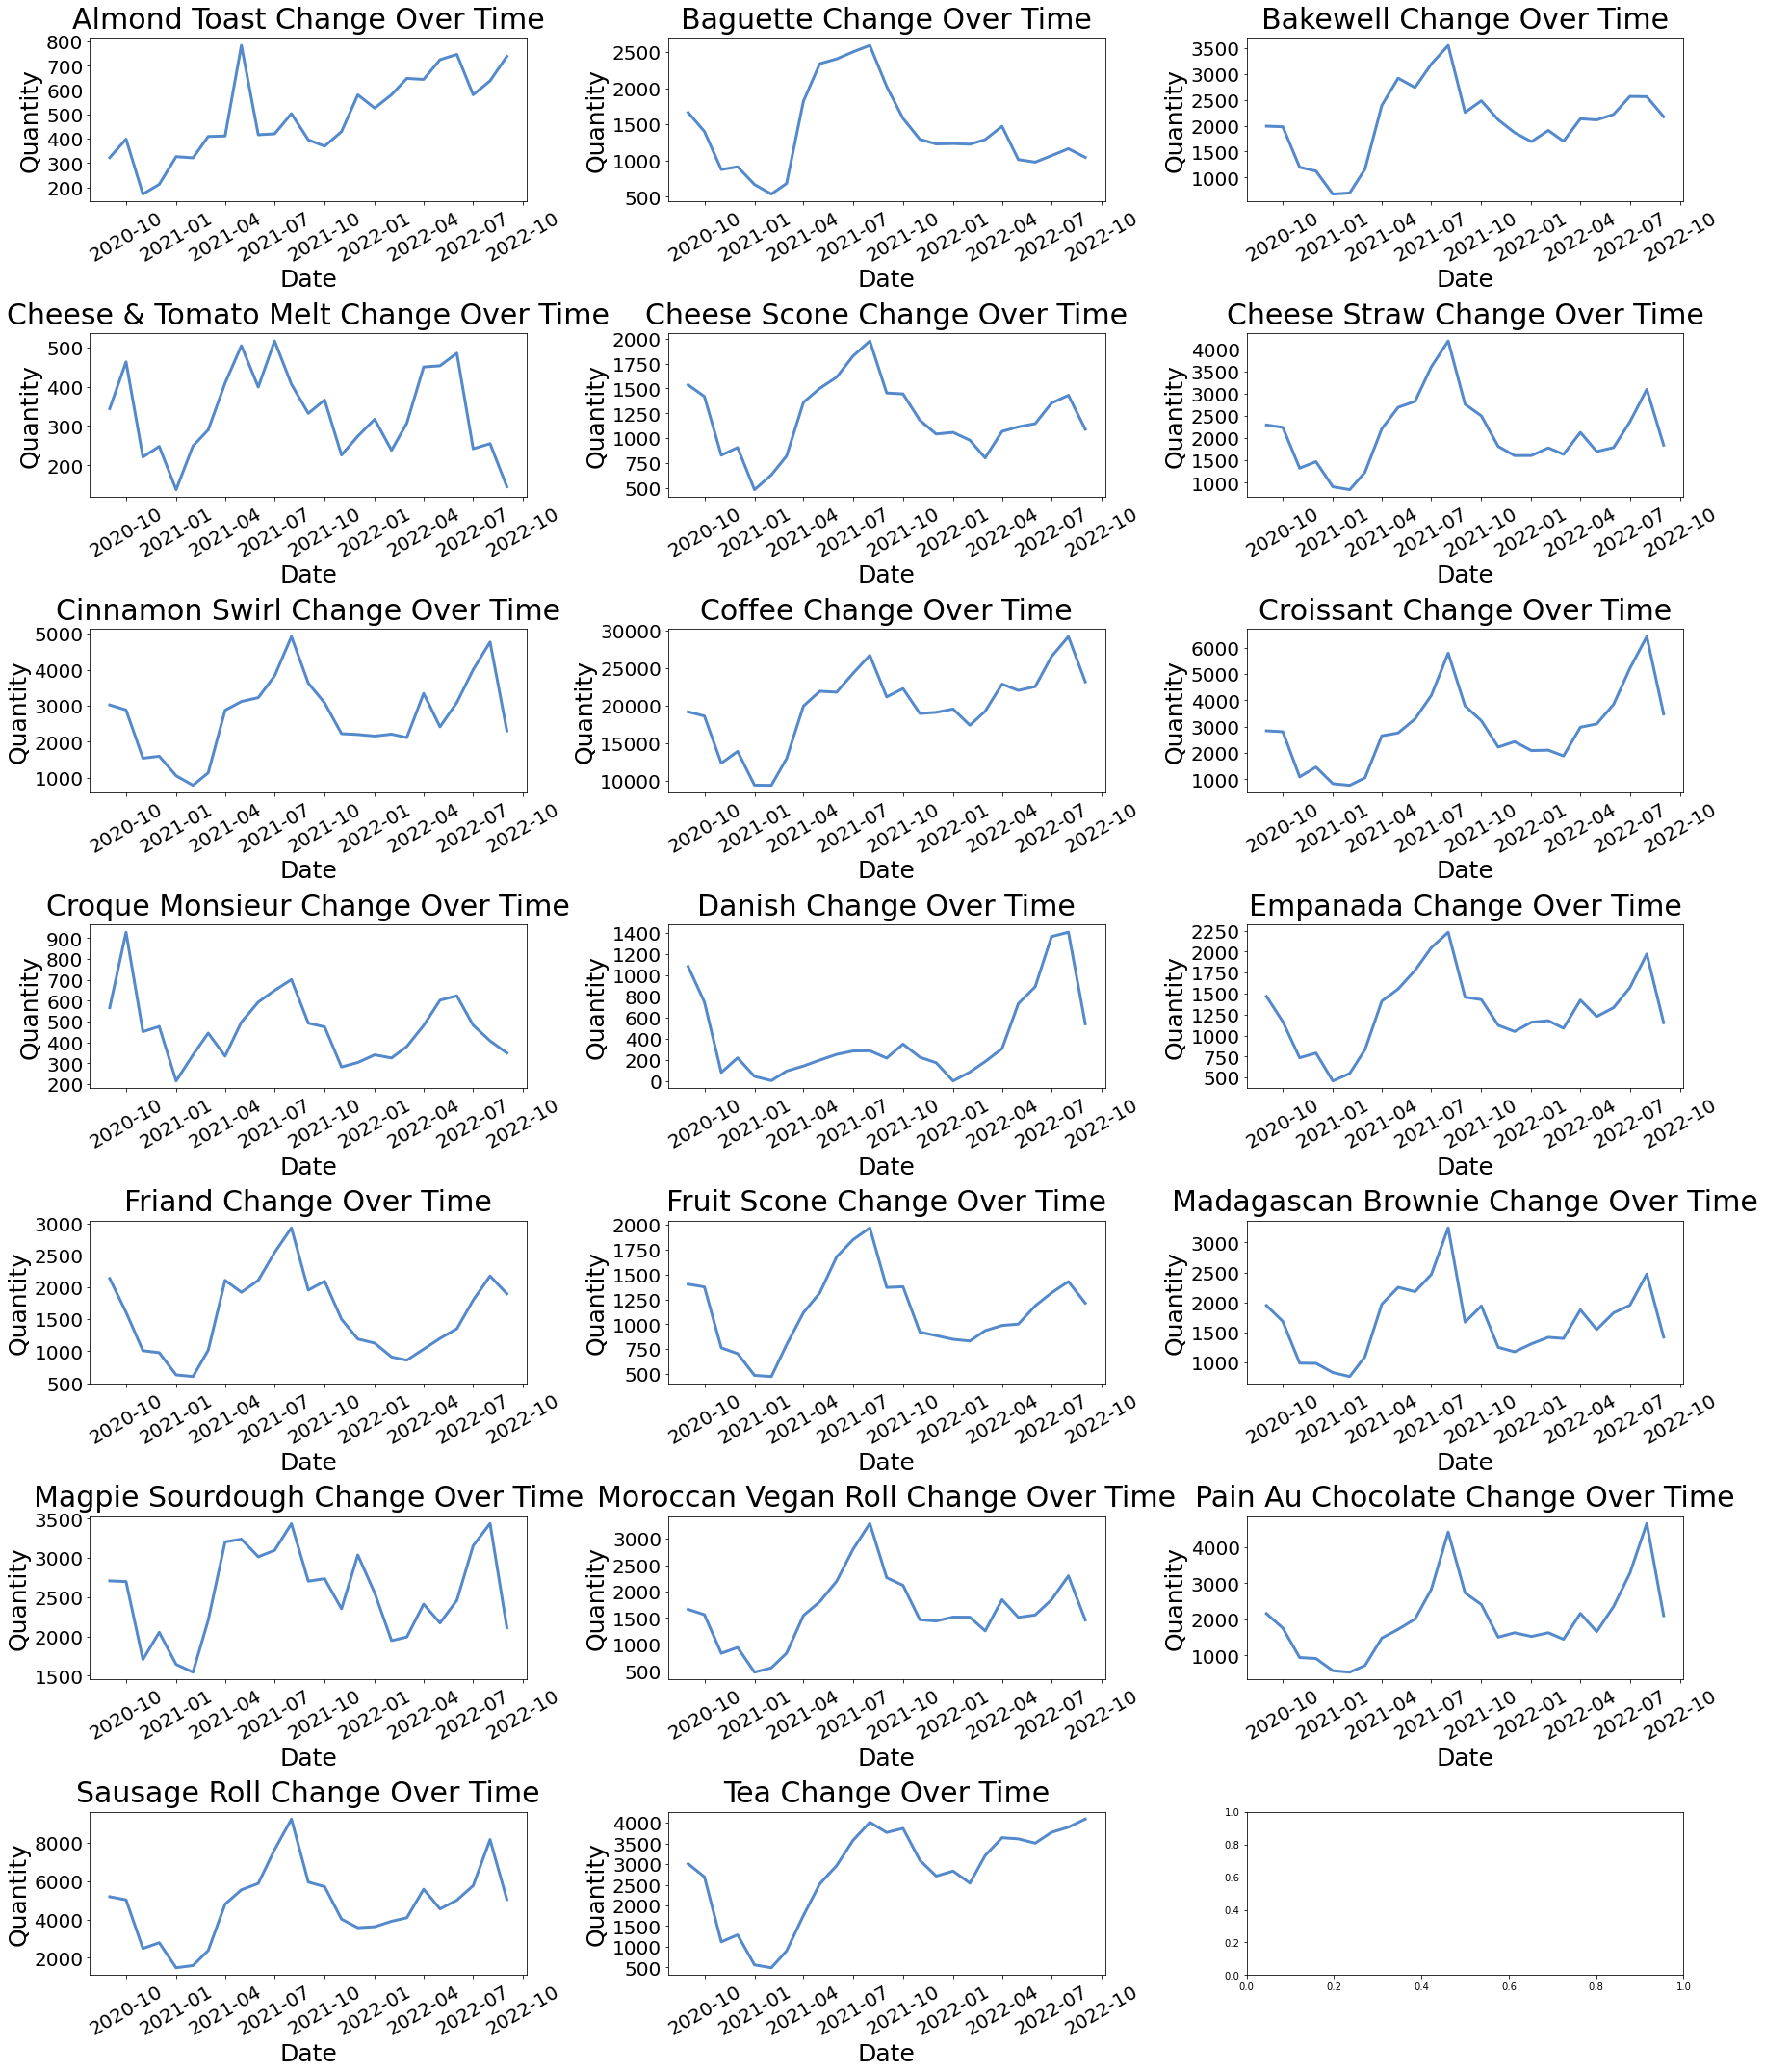

In [55]:
# Loop through column names and plot line plots for monthly sales over time for each product

plt.subplots(7,3, figsize=(25,30))

for i, product in enumerate(product_df.columns):
    plt.subplot(7,3,i+1)
    sns.lineplot(data = product_df, 
                 x=product_df.index, y=product_df[product], color = bakery.light_magpie, linewidth=3)
    
    plt.title(f'{product} Change Over Time', fontsize=30,pad=10)
    plt.ylabel('Quantity', fontsize=25)
    plt.xlabel('Date', fontsize=25)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20, rotation=30)
    plt.tight_layout()
    
plt.show()

## Observations 
- The majority of the products show the same upward and seasonal trend as the overall revenue and quantity of sales 
- `Danish` and `Baguette` products appear to have a less similar pattern. Speaking with owner this is due to them not always being stocked as consistently as the demand is unknown 

As it is known that `TAVG` has a strong correlation with total sales, this will be plotted against the total sales of each product over time to see if the correlation is consistent for all products or certain ones. This will be important to determine for prior to the modelling phase, so it can be determined whether to be included or not for the forecasts of individual products. 

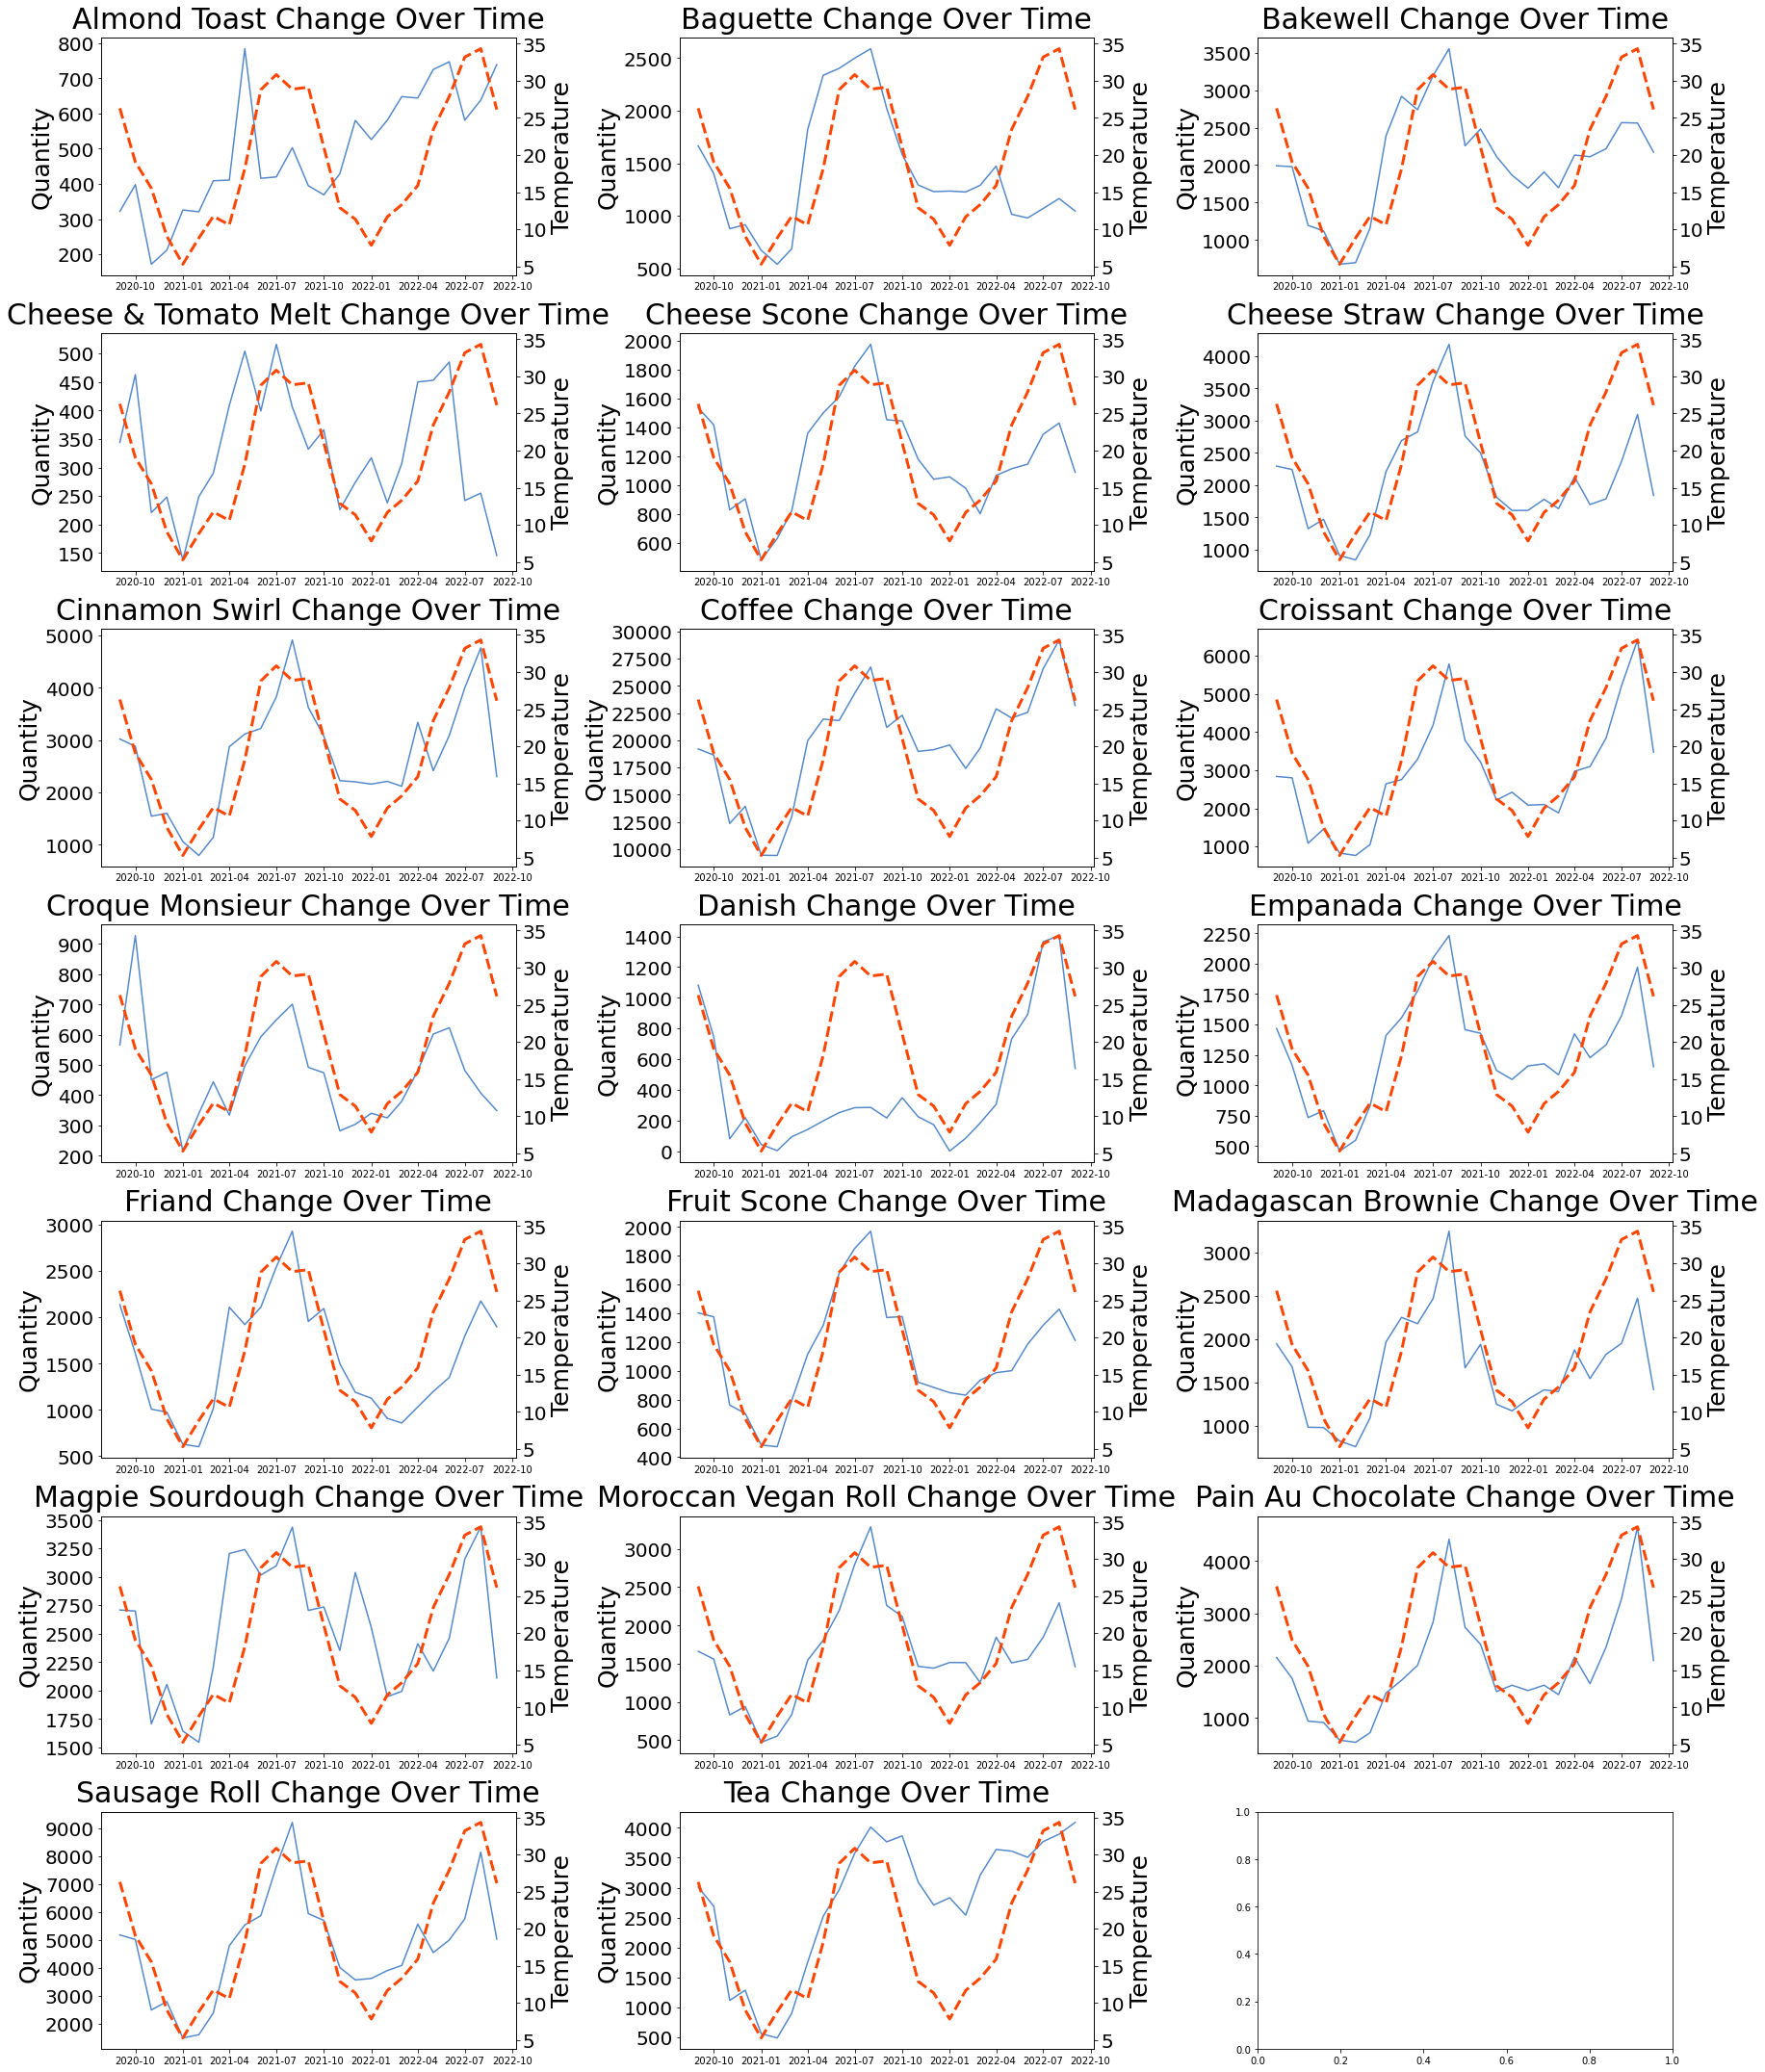

In [56]:
# Loop through column names and plot line plots for monthly sales over time for each product agaisnt TAVG
plt.subplots(7,3, figsize=(25,30))

for i, product in enumerate(product_df.columns):
    plt.subplot(7,3,i+1)
    sns.lineplot(data = product_df, 
                 x=product_df.index, y=product_df[product], color = bakery.light_magpie)
    plt.ylabel('Quantity', fontsize=25)
    plt.yticks(fontsize=20)
    
    ax2 = plt.twinx()
    sns.lineplot(data=total_rev_monthly, x = total_rev_monthly.index, y=total_rev_monthly['TAVG'], ax=ax2,
                color='orangered', linewidth=3, linestyle='--')
    
    plt.title(f'{product} Change Over Time', fontsize=30,pad=10)
    plt.ylabel('Temperature', fontsize=25)
    plt.xlabel('Date', fontsize=25)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20, rotation=30)
    plt.tight_layout()
    
plt.show()

## Observations
- The majority of the products follow the same patter as the `TAVG` line, except for `Tea`, `Friands`, `Almond Toast`, `Danish` and `Cheese and Tomato Melt` products. Therefore, in the modelling phase `TAVG` may not be a useful predictor of total sales. 

To validate this theory and the fact that `PRCP`, `CPI_Electricity` and `CPI_Food` are weaker indicators of individual product sales, a correlation matrix is plotted.

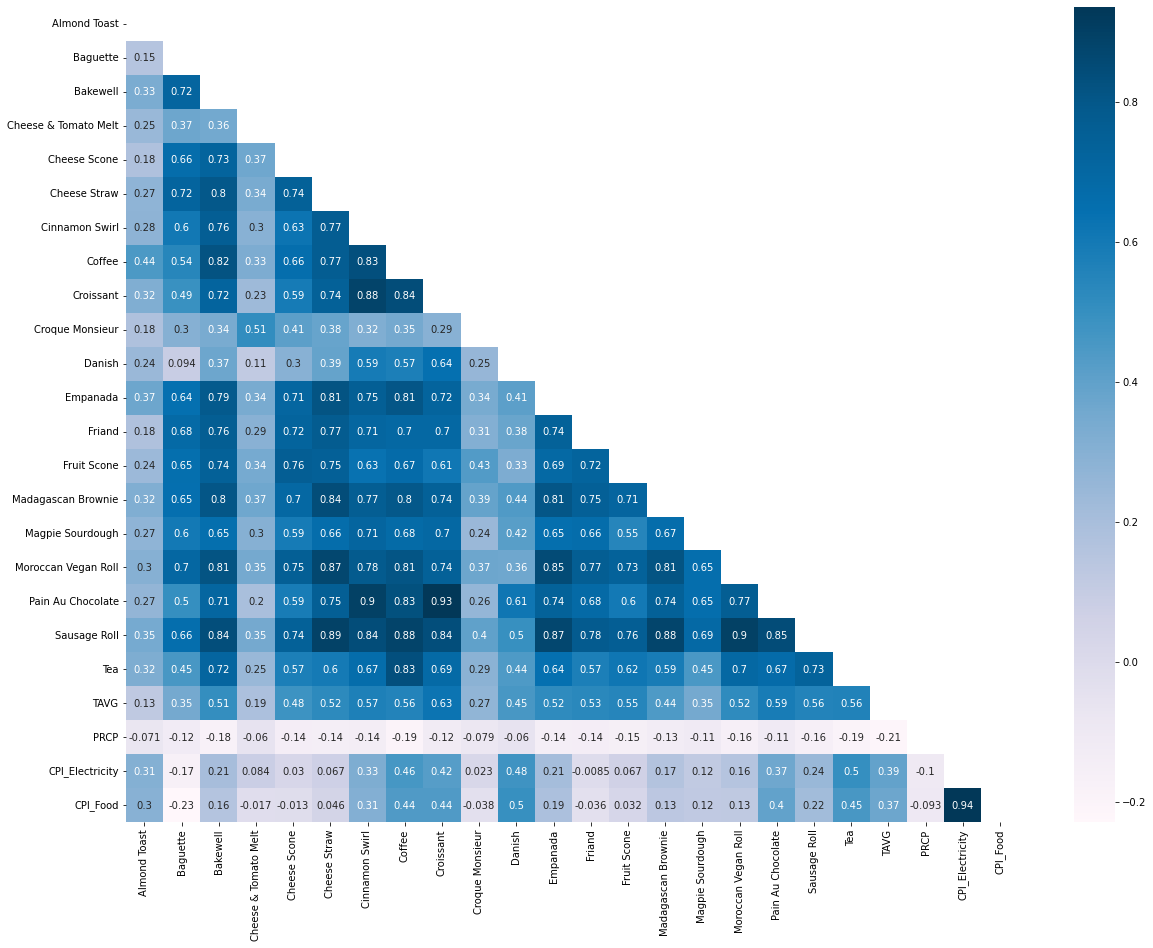

In [57]:
# plotting the correlation matrix using a heatmap 
corr = total_quantity.corr()
plt.figure(figsize=(20,15))
matrix = np.triu(total_quantity.corr())
sns.heatmap(corr, annot=True, mask=matrix, cmap='PuBu')
plt.show()

## Observations
- `PRCP`, `CPI_Electricity` and `CPI_Food` all have weak correlations with the individual products so are less likely to be good predictors of sales 
- `TAVG` has a relatively strong correlation with a about half of the products and a weak one with the other half. Therefore, `TAVG` should only be included in the models where it has a stronger correlation 
- `Coffee` is strong correlated with most of the products, suggesting they could be purchased together 
- `Tea` has a strong correlation to some of the products, such as `Bakewell`, `Sausage Roll`, `Moroccan Vegan Roll` and `Pain Au Chocolate` however it is a weaker correlation than `Coffee` with these products, suggesting `Coffee` is chosen in preference to `Tea`

## Exploration into Relationship with `Tea` and `Coffee` and Other Products

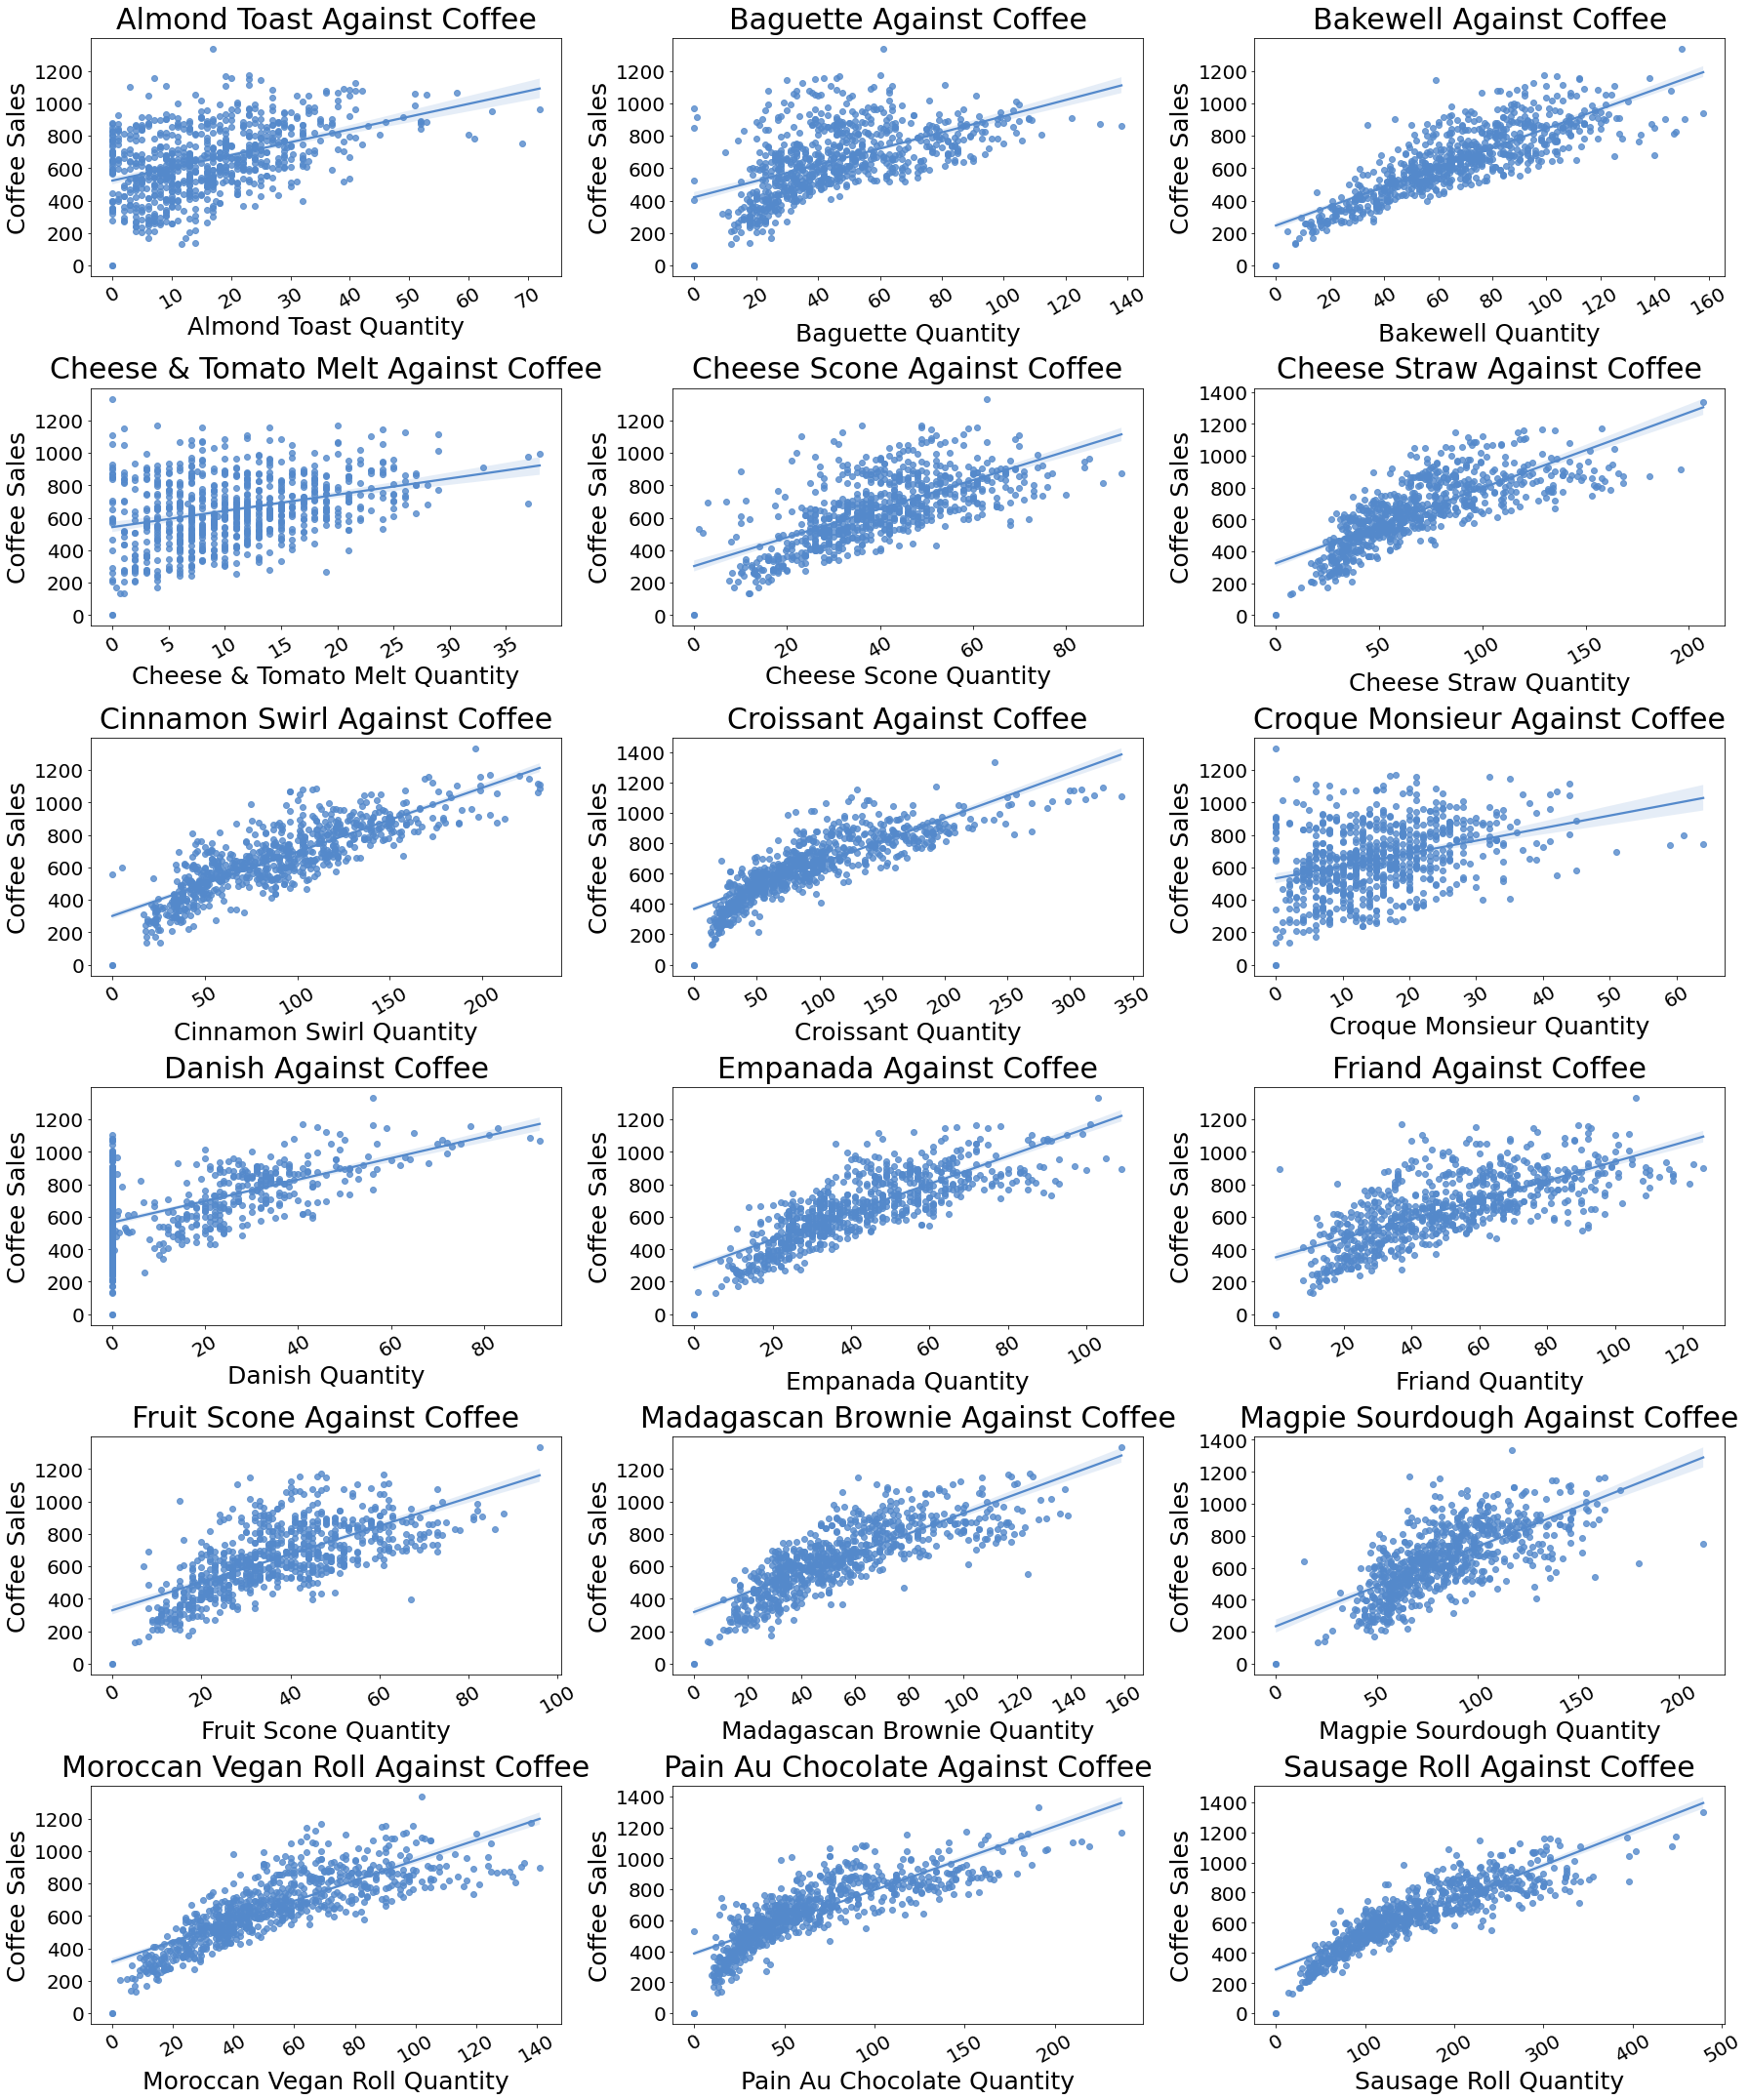

In [58]:
# Loop through product column names against coffee 
plt.subplots(6,3, figsize=(25,30))

for i, product in enumerate(product_df_daily.columns.drop(['Coffee', 'Tea'])):
    plt.subplot(6,3,i+1)
    sns.regplot(data = product_df_daily, 
                 x=product_df_daily[product], y=product_df_daily['Coffee'], color = bakery.light_magpie)
    plt.ylabel('Coffee Sales', fontsize=25)
    plt.yticks(fontsize=20)
    plt.title(f'{product} Against Coffee', fontsize=30,pad=10)
    plt.xlabel(f'{product} Quantity', fontsize=25)
    plt.xticks(fontsize=20, rotation=30)
    plt.tight_layout()
    
plt.show()

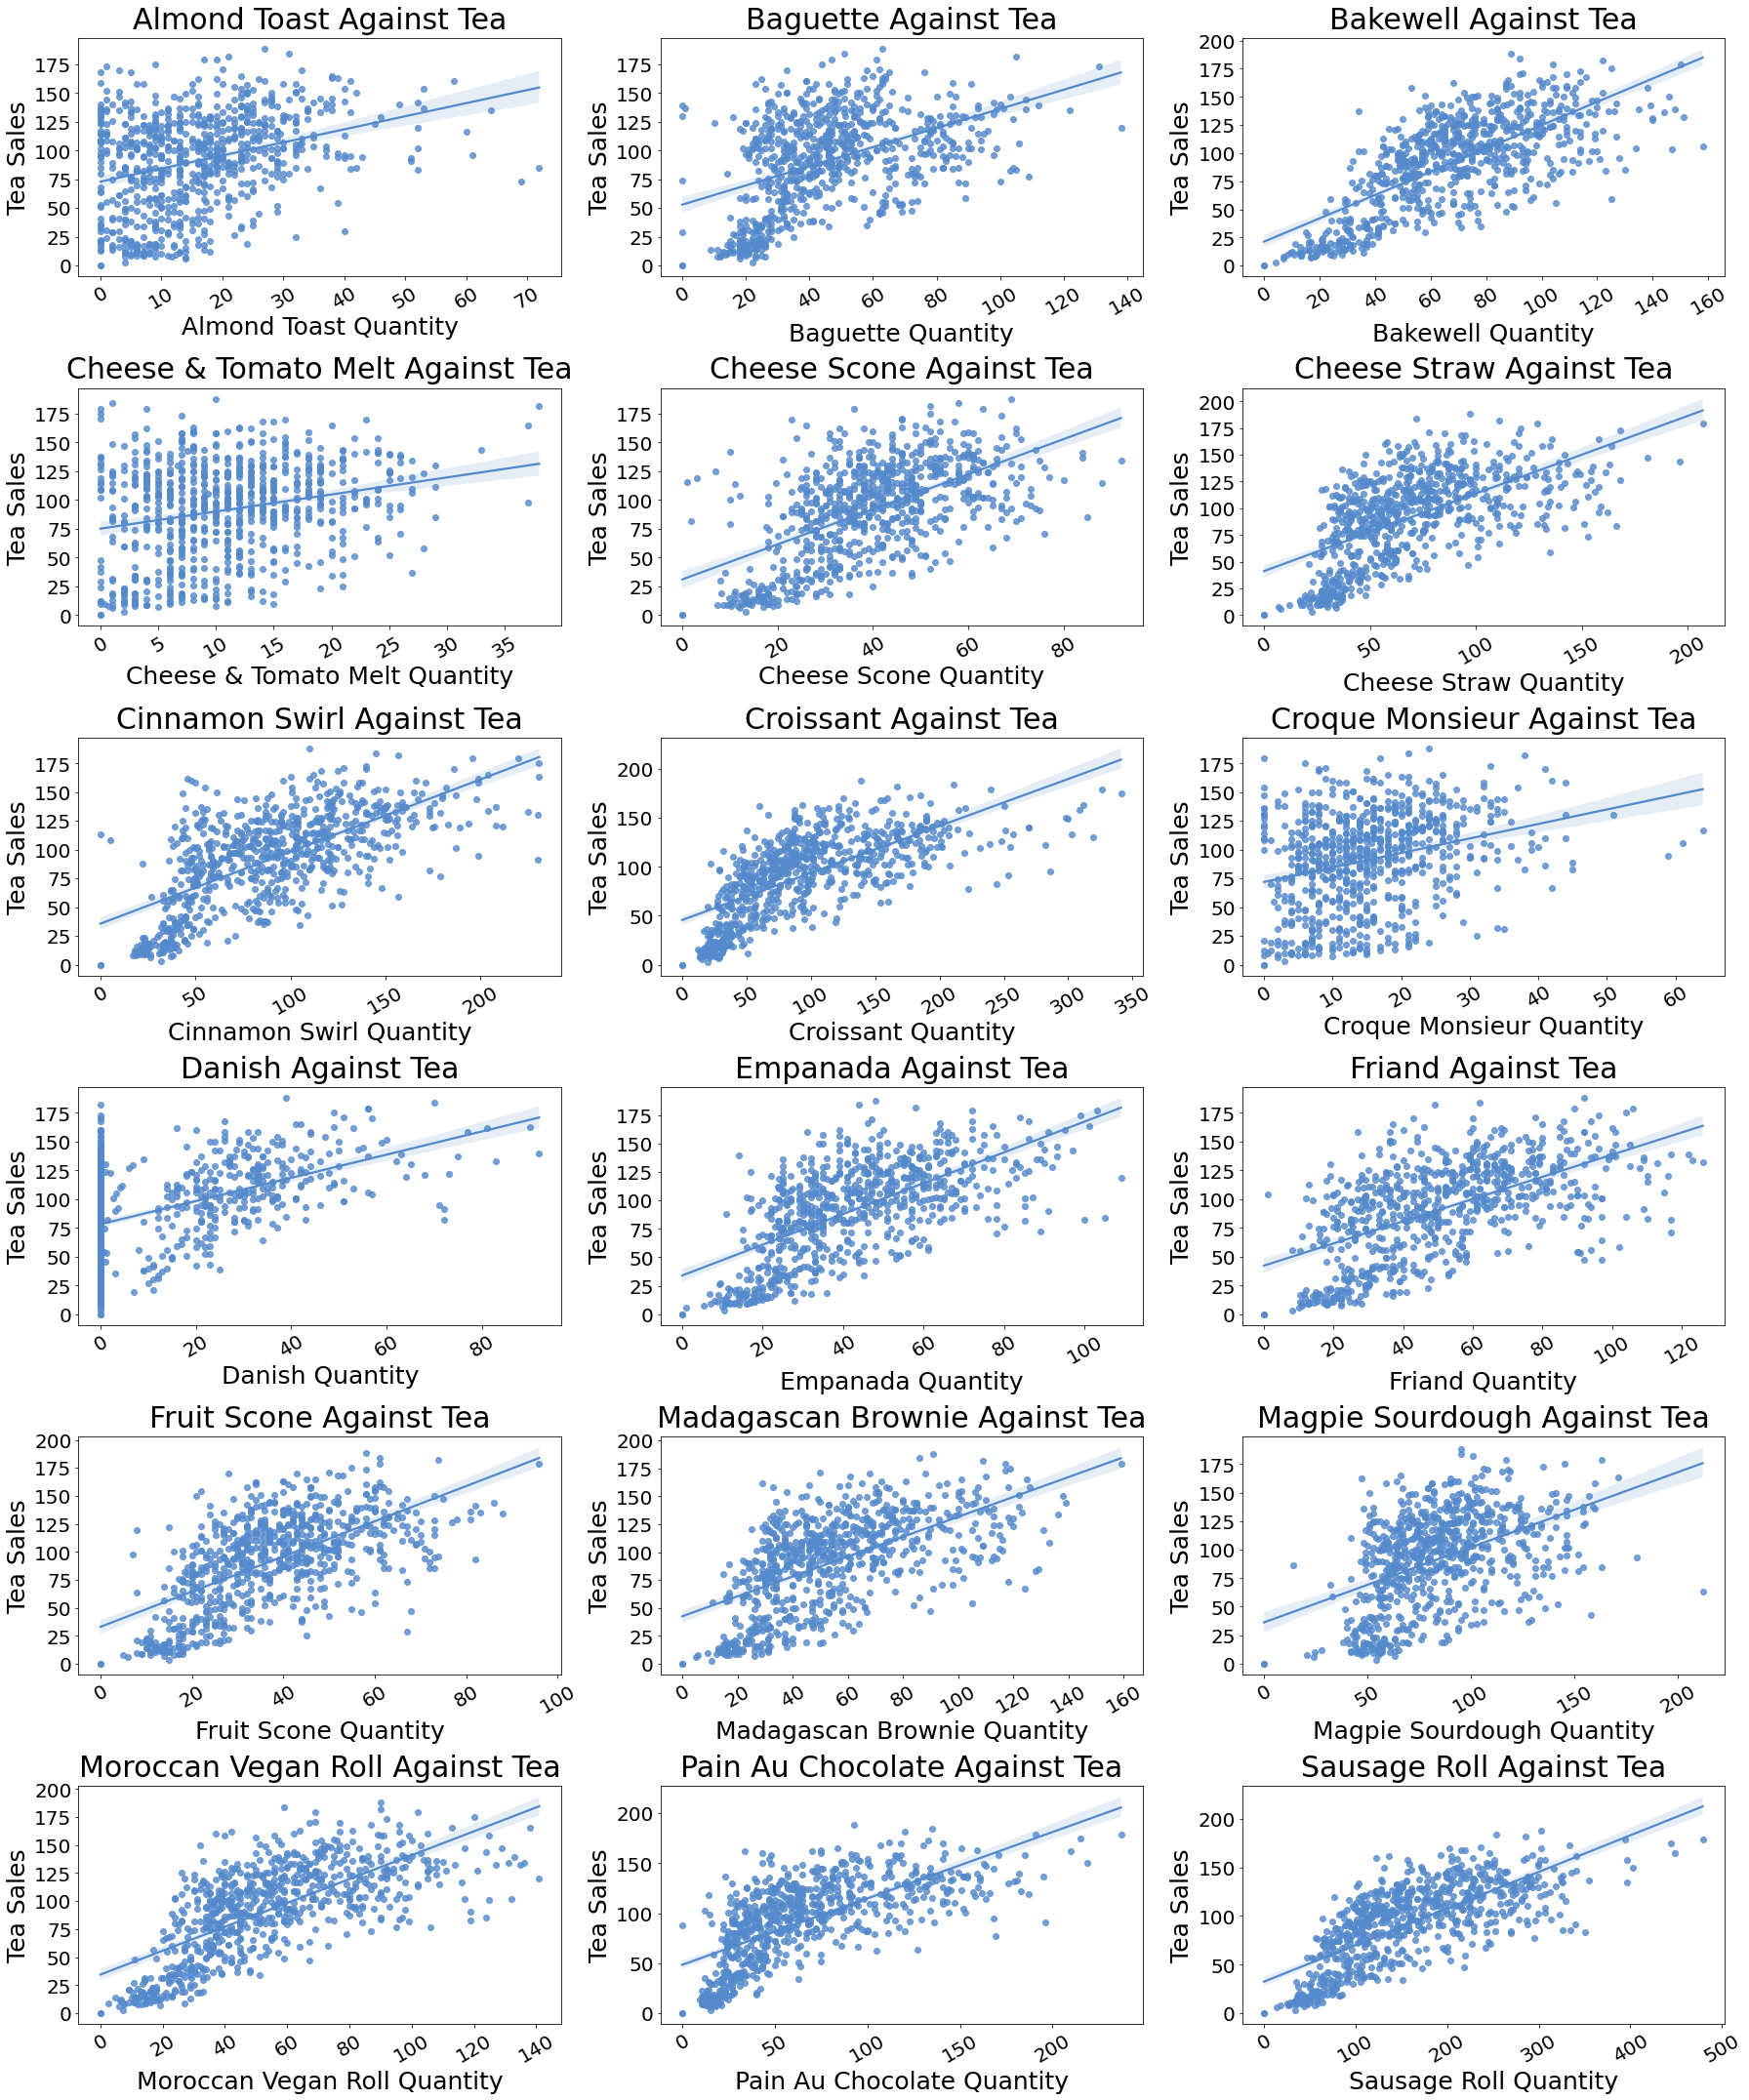

In [59]:

# Loop through product column names against tea 
plt.subplots(6,3, figsize=(25,30))

for i, product in enumerate(product_df_daily.columns.drop(['Coffee', 'Tea'])):
    plt.subplot(6,3,i+1)
    sns.regplot(data = product_df_daily, 
                 x=product_df_daily[product], y=product_df_daily['Tea'], color = bakery.light_magpie)
    plt.ylabel('Tea Sales', fontsize=25)
    plt.yticks(fontsize=20)
    plt.title(f'{product} Against Tea', fontsize=30,pad=10)
    plt.xlabel(f'{product} Quantity', fontsize=25)
    plt.xticks(fontsize=20, rotation=30)
    plt.tight_layout()
    
plt.show()

## Observations 
**UPDATE**

# Summary of Analysis

- Observations 
- Hypothesis
- Therefore MVP model is just rev over time, then products over time, then add T. 